In [4]:
!pip install python-doc
!python3 -m pip install docx2txt
!pip install textract
!sudo apt-get install antiword
!pip install python-docx
!pip install xgboost
!pip install wordcloud
!python -m spacy download en_core_web_sm
!pip install docx2txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.7/39.7 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 44.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of sphinxcontrib-applehelp to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.6/120.6 kB 6.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of sphinxcontrib-devhelp to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 7.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versio

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  antiword
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 118 kB of archives.
After this operation, 603 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 antiword amd64 0.37-16 [118 kB]
Fetched 118 kB in 0s (689 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package antiword.
(Reading database ... 120831 files and directories currentl

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os,re
!pip install docx2txt
import docx2txt
!pip install textract
import textract
import pandas as pd
import numpy as np
!pip install python-docx

from docx import Document
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
nltk.download("stopwords")
import xgboost as xgb

  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3959 sha256=ffbeef4c864191fb04fa05e741ae80248b238f97f4b7eb7097d7d3261de83dcc
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 96.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 83.6 MB/s e

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184487 sha256=7594b28526ed3d02c22b47d5eb5df5244ca3a32cb65f6da71bba53d717942b91
  Stored in directory: /root/.cache/pip/wheels/80/27/06/837436d4c3bd989b957a91679966f207bfd71d358d63a8194d
Successfully built python-docx


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
os.listdir('/content/drive/MyDrive/Project_Resume')

['Resumes']

In [7]:
os.listdir('/content/drive/MyDrive/Project_Resume/Resumes/Peoplesoft resumes')

['Peoplesoft Finance_Arun Venu.doc',
 'Peoplesoft Admin_Priyanka Ramadoss.doc',
 'Peoplesoft Admin_Murali.docx',
 'Peoplesoft Finance_Rahul Ahuja.doc',
 'Peoplesoft FSCM_PriyabrataHota.docx',
 'Peoplesoft Admin_SirazuddinMohammad.docx',
 'Peoplesoft FSCM_SUJATHA.docx',
 'PeopleSoft DBA_Ganesh Alladi.doc',
 'PeopleSoft DBA_Vivekanand Sayana.docx',
 'Peoplesoft Admin_AnubhavSingh.docx',
 'Peoplesoft Admin_G Ananda Rayudu.doc',
 'Peoplesoft Admin_Vinod Akkala.doc',
 'Peoplesoft Admin_srinivasarao.doc',
 'Resume_Subha Santosh_Peoplesoft FSCM.docx',
 'Peoplesoft FSCM_R Ahmed.doc',
 'Peoplesoft FSCM_Murali.docx',
 'Peoplesoft Admin_Varkala Vikas.docx',
 'Peoplesoft Finance_Pritam Biswas.doc',
 'Peoplesoft Admin_Gangareddy.doc',
 'Peoplesoft FSCM_HariNarayana.docx']

In [8]:
os.listdir('/content/drive/MyDrive/Project_Resume/Resumes/SQL Developer Lightning insight')

['Tatikonda Kiran Kumar.doc',
 'Rajupavanakumari[2_10].docx',
 'Buddha Vamsi.docx',
 'Vinod B.docx',
 'RameshNataru[3_4].docx',
 'premsai.docx',
 'Anil kumar.docx',
 'Nazeer Basha.doc',
 'Neeraj Mishra.docx',
 'Ramalakshmi K.docx',
 'AradhanaTripathi[4_0].docx',
 'Priyanka L.doc',
 'PSyamKumar[2_3].docx',
 'kamballapradeep.docx']

In [9]:
os.listdir('/content/drive/MyDrive/Project_Resume/Resumes/workday resumes')

['Gopi Krishna_Hexaware.docx',
 'Hari Krishna M_Hexaware.doc',
 'MooraboyinaGuravaiah_Hexaware.docx',
 'Himaja G_(Hexaware).docx',
 'RahulM_Hexaware.docx',
 'J. Sumanth Royal_Hexaware.doc',
 'Hima Mendu_Hexaware.doc',
 'Srikanth-Hexaware.docx',
 'SSKumar_Hexaware.docx',
 'P V Sai Krishna_ Hexaware.docx',
 'Harikrishna Akula_Hexaware.doc',
 'ChinnaSubbarayuduM_Hexaware.docx',
 'Naresh Babu Cherukuri_Hexaware.doc',
 'Madeeswar A_Hexaware.doc',
 'Vinay Kumar_Hexaware.docx',
 'Punugoti Swetha_Hexaware.doc',
 'Sri Krishna S_Hexaware.doc',
 'RameshP_Hexaware.docx',
 'Jyotiverma_Heaware.docx',
 'ShireeshKumar_Hexaware.doc',
 'Venkateswarlu B_Hexaware.doc']

In [10]:
file_path = []
category = []


directory = '/content/drive/MyDrive/Project_Resume/Resumes'
for i in os.listdir(directory):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory, i)
    file_path.append((textract.process(os.path.join(directory, i))).decode('utf-8'))
    category.append('React JS Developer')
file_path, category

file_path_1 = []
category_1 = []

directory_1 = '/content/drive/MyDrive/Project_Resume/Resumes/Peoplesoft resumes'
for i in os.listdir(directory_1):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_1, i)
    file_path_1.append((textract.process(os.path.join(directory_1, i))).decode('utf-8'))
    category_1.append('Peoplesoft resumes')


file_path_1, category_1

file_path_2 = []
category_2= []


directory_2 = '/content/drive/MyDrive/Project_Resume/Resumes/SQL Developer Lightning insight'
for i in os.listdir(directory_2):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_2, i)
    file_path_2.append((textract.process(os.path.join(directory_2, i))).decode('utf-8'))
    category_2.append('SQL Developer Lightning insight')


file_path_2, category_2


file_path_3 = []
category_3 = []


directory_3 = '/content/drive/MyDrive/Project_Resume/Resumes/workday resumes'
for i in os.listdir(directory_3):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_3, i)
    file_path_3.append((textract.process(os.path.join(directory_3, i))).decode('utf-8'))
    category_3.append('Workday Resume')


file_path_1, category_1

(['\nArun Venu\n\n\n  EXPERIENCE SUMMARY\n\n\n    • Experience of 04 Years 08 Months in multiple PeopleSoft Upgrade,\n      Implementation and Support projects in FSCM/HCM with Global clients.\n    • In Depth Knowledge and experience in working with PeopleTools -\n      Application Engine, PeopleCode, Application Package, File Layout,\n      ExcelToCI, PSQuery, and reporting with SQRs, BI Publisher.\n    • Worked on FSCM upgrade which includes Vanilla Compare, Retrofitting of\n      Objects SIT, UAT and Go Live activities.\n    • Good experience in Upgrade, Implementation modules.\n    • Good experience in all phases of the Application Development cycle -\n      Design, Coding, Testing, Maintenance and Documentation.\n    • Worked on creating custom reports using BI Publisher, SQR, and PS\n      Query.\n    • Worked on Testing tool PTF(Peoplesoft Testing Framework)\n    • Excellent capability to explore, learn and understand newer business\n      domains and technologies.\n    • Good c

In [11]:
data = pd.DataFrame(data = file_path , columns = ['resumes'])
data['category'] = category
data

resumes            category
0   Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  React JS Developer
1   MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...  React JS Developer
2   MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React JS Developer
3   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....  React JS Developer
5   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  React JS Developer
6   \n                              CURRICULUM VIT...  React JS Developer
7   Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer
8   PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...  React JS Developer
9    \n\n \n\nName: M. Prabakaran \nTitle: UI Deve...  React JS Developer
10  \nMaryala Vinay Reddy\n\nProfessional Summary:...  React JS Developer
11  Name: Ravali P \n\n\n\n                       ...  React JS Developer
12  Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...  React JS Developer
13  Naveen Sadhu\n\n\n\n\n\nTitle: software develo...  React JS Developer
14  KAMBALA SAI SURENDRA   \n\n \n\n \n\n \n\n\n\n...  React JS Developer
15  Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer
16  \n [pic]\n\nPROFILE\n\n Searching for the oppo...  React JS Developer
17  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...  React JS Developer
18  Venkatalakshmi Pedireddy\n\nSoftware Developer...  React JS Developer
19  Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...  React JS Developer
20  MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  React JS Developer
21  SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...  React JS Developer
22  HARIPRIYA BATTINA \n\nExperience as UI Develop...  React JS Developer
23  Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...  React JS Developer

In [12]:
df1 = pd.DataFrame(data = file_path_1 , columns = ['resumes'])
df1['category_1'] = category_1
df1

resumes          category_1
0   \nArun Venu\n\n\n  EXPERIENCE SUMMARY\n\n\n   ...  Peoplesoft resumes
1   \nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...  Peoplesoft resumes
2   Classification: Internal\n\nClassification: In...  Peoplesoft resumes
3   \nRahul Ahuja\n-------------------------------...  Peoplesoft resumes
4   Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...  Peoplesoft resumes
5   SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...  Peoplesoft resumes
6   Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...  Peoplesoft resumes
7   \n                        PeopleSoft Admin/Peo...  Peoplesoft resumes
8   PeopleSoft Administration\n\n \n\nVivekanand S...  Peoplesoft resumes
9   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  Peoplesoft resumes
10  \n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...  Peoplesoft resumes
11  \nVinod Akkala\nPeopleSoft DBA Admin.\n\n\nPro...  Peoplesoft resumes
12  \n                          PEOPLESOFT Adminis...  Peoplesoft resumes
13  C O N T A C T :\n\n\n\nAddress: Manyata Tech P...  Peoplesoft resumes
14  \n\nR Ahmed\n                          PeopleS...  Peoplesoft resumes
15  Murali\t\t       \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...  Peoplesoft resumes
16  PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...  Peoplesoft resumes
17  \n|Personal Details                           ...  Peoplesoft resumes
18  \n                      PeopleSoft Database Ad...  Peoplesoft resumes
19  Hari Narayana \t\t              \n\n\t\n\n\n\n...  Peoplesoft resumes

In [13]:
df2 = pd.DataFrame(data = file_path_2, columns = ['resumes'])
df2['category_2'] = category_2
df2

resumes  \
0   \n\nCareer objective\n\n\nA rewarding opportun...   
1   RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...   
2   BUDDHA VAMSI                                  ...   
3   SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...   
4   Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...   
5   SQL DEVELOPER\n\nName: -   Bandi prem sai\n\n\...   
6   ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Devel...   
7   \n\n\n\n\n “ Hyderabad\nNazeer Basha\n SQL and...   
8   Resume\n\nName     :  Neeraj Mishra\n\n\n\nExp...   
9   resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...   
10  Aradhana Tripathi\n\n\n\nCurrent Location: Gac...   
11  \n                                       SQL S...   
12  SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...   
13  KAMBALLA PRADEEP                              ...   

                         category_2  
0   SQL Developer Lightning insight  
1   SQL Developer Lightning insight  
2   SQL Developer Lightning insight  
3   SQL Developer Lightning insight  
4   SQL Developer Lightning insight  
5   SQL Developer Lightning insight  
6   SQL Developer Lightning insight  
7   SQL Developer Lightning insight  
8   SQL Developer Lightning insight  
9   SQL Developer Lightning insight  
10  SQL Developer Lightning insight  
11  SQL Developer Lightning insight  
12  SQL Developer Lightning insight  
13  SQL Developer Lightning insight

In [14]:
df3 = pd.DataFrame(data = file_path_3 , columns = ['resumes'])
df3['category_3'] = category_3
df3

resumes      category_3
0   Name         : Gopi Krishna Reddy\n\n\t\t\t\t ...  Workday Resume
1   \n                               Hari Krishna ...  Workday Resume
2   Mooraboyina Guravaiah\n\nWorkday Integration S...  Workday Resume
3   G Himaja\n\n                                  ...  Workday Resume
4   Workday HCM  Techno functional Consultant     ...  Workday Resume
5   \n[pic]                                   Name...  Workday Resume
6   \nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...  Workday Resume
7   Srikanth (WORKDAY hCM Consultant)\t           ...  Workday Resume
8   WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...  Workday Resume
9   VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...  Workday Resume
10  \nHarikrishna Akula\n\n\n\n Summary:\n    ❖ 5....  Workday Resume
11  Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...  Workday Resume
12  \nName  : Naresh Babu Cherukuri\n\n\nObjective...  Workday Resume
13  \n\n                             Madeeswar A\n...  Workday Resume
14  Vinay kumar .v\nWorkday Functional Consultant\...  Workday Resume
15  \n  [pic]\n  [pic]\n\n    • 3.3 years of IT ex...  Workday Resume
16  \n      Workday Integration Consultant\n\nName...  Workday Resume
17  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...  Workday Resume
18  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...  Workday Resume
19  \nShireesh                                    ...  Workday Resume
20  \nVenkateswarlu.B                             ...  Workday Resume

In [15]:
# Create a DataFrame
resume_data = data.append([df1, df2, df3], ignore_index = True)
resume_data

<ipython-input-15-394d65612247>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resume_data = data.append([df1, df2, df3], ignore_index = True)


resumes            category  \
0   Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  React JS Developer   
1   MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...  React JS Developer   
2   MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React JS Developer   
3   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer   
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....  React JS Developer   
..                                                ...                 ...   
74  \n      Workday Integration Consultant\n\nName...                 NaN   
75  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...                 NaN   
76  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...                 NaN   
77  \nShireesh                                    ...                 NaN   
78  \nVenkateswarlu.B                             ...                 NaN   

   category_1 category_2      category_3  
0         NaN        NaN             NaN  
1         NaN        NaN             NaN  
2         NaN        NaN             NaN  
3         NaN        NaN             NaN  
4         NaN        NaN             NaN  
..        ...        ...             ...  
74        NaN        NaN  Workday Resume  
75        NaN        NaN  Workday Resume  
76        NaN        NaN  Workday Resume  
77        NaN        NaN  Workday Resume  
78        NaN        NaN  Workday Resume  

[79 rows x 5 columns]

 Merge all Unnecessary column in One Column


In [16]:
resume_data['Category'] = category+category_1+ category_2 + category_3
resume_data

resumes            category  \
0   Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  React JS Developer   
1   MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...  React JS Developer   
2   MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React JS Developer   
3   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer   
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....  React JS Developer   
..                                                ...                 ...   
74  \n      Workday Integration Consultant\n\nName...                 NaN   
75  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...                 NaN   
76  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...                 NaN   
77  \nShireesh                                    ...                 NaN   
78  \nVenkateswarlu.B                             ...                 NaN   

   category_1 category_2      category_3            Category  
0         NaN        NaN             NaN  React JS Developer  
1         NaN        NaN             NaN  React JS Developer  
2         NaN        NaN             NaN  React JS Developer  
3         NaN        NaN             NaN  React JS Developer  
4         NaN        NaN             NaN  React JS Developer  
..        ...        ...             ...                 ...  
74        NaN        NaN  Workday Resume      Workday Resume  
75        NaN        NaN  Workday Resume      Workday Resume  
76        NaN        NaN  Workday Resume      Workday Resume  
77        NaN        NaN  Workday Resume      Workday Resume  
78        NaN        NaN  Workday Resume      Workday Resume  

[79 rows x 6 columns]

In [17]:
resume_data.drop(['category', 'category_1', 'category_2', 'category_3'], axis = 1, inplace = True)
resume_data

resumes            Category
0   Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  React JS Developer
1   MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...  React JS Developer
2   MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React JS Developer
3   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....  React JS Developer
..                                                ...                 ...
74  \n      Workday Integration Consultant\n\nName...      Workday Resume
75  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...      Workday Resume
76  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...      Workday Resume
77  \nShireesh                                    ...      Workday Resume
78  \nVenkateswarlu.B                             ...      Workday Resume

[79 rows x 2 columns]

In [18]:
resume_data.head(15)


resumes            Category
0   Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  React JS Developer
1   MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...  React JS Developer
2   MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React JS Developer
3   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....  React JS Developer
5   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  React JS Developer
6   \n                              CURRICULUM VIT...  React JS Developer
7   Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer
8   PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...  React JS Developer
9    \n\n \n\nName: M. Prabakaran \nTitle: UI Deve...  React JS Developer
10  \nMaryala Vinay Reddy\n\nProfessional Summary:...  React JS Developer
11  Name: Ravali P \n\n\n\n                       ...  React JS Developer
12  Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...  React JS Developer
13  Naveen Sadhu\n\n\n\n\n\nTitle: software develo...  React JS Developer
14  KAMBALA SAI SURENDRA   \n\n \n\n \n\n \n\n\n\n...  React JS Developer

In [19]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   resumes   79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [20]:
resume_data.to_csv('finalRaw_Resume.csv', index=False)


In [21]:
import pandas as pd
resume_data = pd.read_csv("/content/finalRaw_Resume.csv")
resume_data

resumes            Category
0   Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  React JS Developer
1   MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...  React JS Developer
2   MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React JS Developer
3   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....  React JS Developer
..                                                ...                 ...
74  \n      Workday Integration Consultant\n\nName...      Workday Resume
75  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...      Workday Resume
76  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...      Workday Resume
77  \nShireesh                                    ...      Workday Resume
78  \nVenkateswarlu.B                             ...      Workday Resume

[79 rows x 2 columns]

In [22]:
df = pd.read_csv('/content/finalRaw_Resume.csv')

In [23]:
# Define a function to extract name using spaCy's named entity recognition (NER)
import re
import pandas as pd
import spacy
from spacy.matcher import Matcher
nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)

def extract_name(resume_text):
    nlp_text = nlp(resume_text)

    # First name and Last name are always Proper Nouns
    pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]

    matcher.add('NAME', [pattern], on_match = None)

    matches = matcher(nlp_text)

    for match_id, start, end in matches:
        span = nlp_text[start:end]
        return span.text
df['Name'] = df['resumes'].apply(extract_name)
df['Name']

0           Ranga Gaganam
1          MD KHIZARUDDIN
2          MAREEDU LOKESH
3             SHAIK ABDUL
4         KAMALAKAR REDDY
             ...         
74    Workday Integration
75               Ramesh A
76            JYOTI VERMA
77         HCM Consultant
78            Workday HCM
Name: Name, Length: 79, dtype: object

In [24]:
def education(resumes):
    education_pattern = r'Education:.*?((?:\n.+\n)+)'
    education_match = re.search(education_pattern, resumes, re.IGNORECASE)
    if education_match:
        return education_match.group(1).strip()
    else:
        return '-'

df['Education'] = df['resumes'].apply(education)

df.head()

resumes            Category  \
0  Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  React JS Developer   
1  MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...  React JS Developer   
2  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React JS Developer   
3  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer   
4  KAMALAKAR REDDY. A \n\nLinked In: https://www....  React JS Developer   

              Name Education  
0    Ranga Gaganam         -  
1   MD KHIZARUDDIN         -  
2   MAREEDU LOKESH         -  
3      SHAIK ABDUL         -  
4  KAMALAKAR REDDY         -

In [25]:
def experience(resumes):
    experience_pattern = r'\b(?!2012|100)(?:(?:0?\.\d+|\d+\.\d+)|[1-9]\d?(?:\.\d+)?)(?:\s*(?:years?|yrs?)\s*)?(?:\s*\d+(?:\.\d+)?\s*(?:months?|mos?)\s*)?(?:\s*(?:of\s)?experience)?'
    experience = re.search(experience_pattern, resumes, re.IGNORECASE)
    if experience:
        experience_value = re.findall(r'\d+(?:\.\d+)?', experience.group())
        # Exclude numbers greater than 26
        if float(experience_value[0]) <= 26:
            return experience_value[0]
    return ''

df['Experience'] = df['resumes'].apply(experience)
df.head()

resumes            Category  \
0  Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  React JS Developer   
1  MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...  React JS Developer   
2  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React JS Developer   
3  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer   
4  KAMALAKAR REDDY. A \n\nLinked In: https://www....  React JS Developer   

              Name Education Experience  
0    Ranga Gaganam         -          1  
1   MD KHIZARUDDIN         -         20  
2   MAREEDU LOKESH         -          2  
3      SHAIK ABDUL         -          2  
4  KAMALAKAR REDDY         -

In [26]:
def work_experience(resumes):
    experience_pattern = r'(\d+(\.\d+)?\s*(?:years?|yrs?)\s*(?:of\s+experience)?)[\s-]*(.*)'

    match = re.search(experience_pattern, resumes, re.IGNORECASE)

    if match:
        return match.group(3).strip()
    else:
        return 'Not Found'

df['Work Experience'] = df['resumes'].apply(work_experience)
df.head()

resumes            Category  \
0  Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  React JS Developer   
1  MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...  React JS Developer   
2  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React JS Developer   
3  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer   
4  KAMALAKAR REDDY. A \n\nLinked In: https://www....  React JS Developer   

              Name Education Experience  \
0    Ranga Gaganam         -          1   
1   MD KHIZARUDDIN         -         20   
2   MAREEDU LOKESH         -          2   
3      SHAIK ABDUL         -          2   
4  KAMALAKAR REDDY         -              

                                     Work Experience  
0                                          Not Found  
1                                          Not Found  
2  in software design, development, implementatio...  
3                              ’ Experience in Wipro  
4  in UI Development of Enterprise Applications, ...

In [27]:
def skillset(resumes, category):
    skills = []
    if category == 'SQLDeveloper':
        predefined_skills = ['SQL', 'Database Management', 'Data Analysis', 'Query Optimization', 'ETL', 'Performance Tuning', 'Stored Procedures', 'Data Modeling', 'Indexing', 'Data Warehousing']
    elif category == 'WorkDay':
        predefined_skills = ['Workday', 'HCM', 'Integration', 'Consultant', 'Business Processes', 'Configuration', 'Report Writing', 'Security Administration', 'Absence Management', 'Benefits Administration']
    elif category == 'Peoplesoft':
        predefined_skills = ['Peoplesoft', 'HRMS', 'Payroll Management', 'PeopleTools', 'Application Designer', 'PeopleCode', 'Component Interface', 'SQR', 'Integration Broker', 'Workflow']
    elif category == 'React JS Developer':
        predefined_skills = ['React JS', 'UI Development', 'JavaScript', 'HTML', 'CSS', 'RESTful APIs', 'React Router', 'Redux', 'Webpack', 'Testing (Jest/Enzyme)']
    else:
        predefined_skills = []

    for skill in predefined_skills:
        pattern = r'\b{}\b'.format(re.escape(skill))
        if re.search(pattern, resumes, re.IGNORECASE):
            skills.append(skill)

    return ', '.join(skills[:10])

# Apply the function to the DataFrame based on the Category column
df['Technical Skills'] = df.apply(lambda x: skillset(x['resumes'], x['Category']), axis=1)
df.head()

resumes            Category  \
0  Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  React JS Developer   
1  MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...  React JS Developer   
2  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React JS Developer   
3  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer   
4  KAMALAKAR REDDY. A \n\nLinked In: https://www....  React JS Developer   

              Name Education Experience  \
0    Ranga Gaganam         -          1   
1   MD KHIZARUDDIN         -         20   
2   MAREEDU LOKESH         -          2   
3      SHAIK ABDUL         -          2   
4  KAMALAKAR REDDY         -              

                                     Work Experience  \
0                                          Not Found   
1                                          Not Found   
2  in software design, development, implementatio...   
3                              ’ Experience in Wipro   
4  in UI Development of Enterprise Applications, ...   

                                    Technical Skills  
0                            JavaScript, HTML, Redux  
1  React JS, UI Development, JavaScript, HTML, CS...  
2                    React JS, JavaScript, HTML, CSS  
3                        React JS, JavaScript, Redux  
4  React JS, UI Development, JavaScript, HTML, CS...

In [28]:
# Extract location using regular expressions
location_pattern = r'\b(Hyderabad|Pune|Mumbai|Bangalore|delhi|chennai|lucknow|nagpur|indore|Coimbatore|vizag|kolkata|suart|jaipur|ahemdabad|kochi)\b'
df['Location'] = df['resumes'].apply(lambda x: re.findall(location_pattern, str(x), re.IGNORECASE)[0].strip() if re.findall(location_pattern, str(x), re.IGNORECASE) else 'Not Found')
df['Location']

0     Hyderabad
1          Pune
2     Not Found
3     Not Found
4     HYDERABAD
        ...    
74    Not Found
75    Not Found
76    Hyderabad
77    Hyderabad
78    Bangalore
Name: Location, Length: 79, dtype: object

In [29]:
# Extract links from the 'resumes' column
link_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
df['Link'] = df['resumes'].apply(lambda x: re.findall(link_pattern, str(x)) if re.findall(link_pattern, str(x)) else 'Not Found')
df['Link']

0                                             Not Found
1                                             Not Found
2                                             Not Found
3     [https://www.linkedin.com/in/sharuk-abdul-99b7...
4     [https://www.linkedin.com/in/kamalakar-reddy-7...
                            ...                        
74                                            Not Found
75                                            Not Found
76                                            Not Found
77                                            Not Found
78                                            Not Found
Name: Link, Length: 79, dtype: object

In [30]:
df.head()

resumes            Category  \
0  Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  React JS Developer   
1  MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...  React JS Developer   
2  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React JS Developer   
3  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer   
4  KAMALAKAR REDDY. A \n\nLinked In: https://www....  React JS Developer   

              Name Education Experience  \
0    Ranga Gaganam         -          1   
1   MD KHIZARUDDIN         -         20   
2   MAREEDU LOKESH         -          2   
3      SHAIK ABDUL         -          2   
4  KAMALAKAR REDDY         -              

                                     Work Experience  \
0                                          Not Found   
1                                          Not Found   
2  in software design, development, implementatio...   
3                              ’ Experience in Wipro   
4  in UI Development of Enterprise Applications, ...   

                                    Technical Skills   Location  \
0                            JavaScript, HTML, Redux  Hyderabad   
1  React JS, UI Development, JavaScript, HTML, CS...       Pune   
2                    React JS, JavaScript, HTML, CSS  Not Found   
3                        React JS, JavaScript, Redux  Not Found   
4  React JS, UI Development, JavaScript, HTML, CS...  HYDERABAD   

                                                Link  
0                                          Not Found  
1                                          Not Found  
2                                          Not Found  
3  [https://www.linkedin.com/in/sharuk-abdul-99b7...  
4  [https://www.linkedin.com/in/kamalakar-reddy-7...

In [31]:
df.to_csv('finalp247 skills.csv', index=False)

In [32]:
df=pd.read_csv("finalp247 skills.csv")
df

resumes            Category  \
0   Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  React JS Developer   
1   MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...  React JS Developer   
2   MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React JS Developer   
3   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer   
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....  React JS Developer   
..                                                ...                 ...   
74  \n      Workday Integration Consultant\n\nName...      Workday Resume   
75  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...      Workday Resume   
76  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...      Workday Resume   
77  \nShireesh                                    ...      Workday Resume   
78  \nVenkateswarlu.B                             ...      Workday Resume   

                   Name Education  Experience  \
0         Ranga Gaganam         -         1.0   
1        MD KHIZARUDDIN         -        20.0   
2        MAREEDU LOKESH         -         2.0   
3           SHAIK ABDUL         -         2.0   
4       KAMALAKAR REDDY         -         NaN   
..                  ...       ...         ...   
74  Workday Integration         -         4.0   
75             Ramesh A         -         5.0   
76          JYOTI VERMA         -         3.0   
77       HCM Consultant         -        10.0   
78          Workday HCM         -         5.3   

                                      Work Experience  \
0                                           Not Found   
1                                           Not Found   
2   in software design, development, implementatio...   
3                               ’ Experience in Wipro   
4   in UI Development of Enterprise Applications, ...   
..                                                ...   
74    as Workday Consultant and  good  experience  on   
75                                          Not Found   
76           in Workday as Functional HCM Consultant.   
77                                                  .   
78          in IT in which 3+ years of experience  in   

                                     Technical Skills   Location  \
0                             JavaScript, HTML, Redux  Hyderabad   
1   React JS, UI Development, JavaScript, HTML, CS...       Pune   
2                     React JS, JavaScript, HTML, CSS  Not Found   
3                         React JS, JavaScript, Redux  Not Found   
4   React JS, UI Development, JavaScript, HTML, CS...  HYDERABAD   
..                                                ...        ...   
74                                                NaN  Not Found   
75                                                NaN  Not Found   
76                                                NaN  Hyderabad   
77                                                NaN  Hyderabad   
78                                                NaN  Bangalore   

                                                 Link  
0                                           Not Found  
1                                           Not Found  
2                                           Not Found  
3   ['https://www.linkedin.com/in/sharuk-abdul-99b...  
4   ['https://www.linkedin.com/in/kamalakar-reddy-...  
..                                                ...  
74                                          Not Found  
75                                          Not Found  
76                                          Not Found  
77                                          Not Found  
78                                          Not Found  

[79 rows x 9 columns]

In [33]:
df['Category'].unique

<bound method Series.unique of 0     React JS Developer
1     React JS Developer
2     React JS Developer
3     React JS Developer
4     React JS Developer
             ...        
74        Workday Resume
75        Workday Resume
76        Workday Resume
77        Workday Resume
78        Workday Resume
Name: Category, Length: 79, dtype: object>

In [34]:
df.isnull().sum()

resumes              0
Category             0
Name                 0
Education            0
Experience           4
Work Experience      0
Technical Skills    56
Location             0
Link                 0
dtype: int64

Number of Words in each Resume

In [35]:
df['Word_Count'] = df['resumes'].apply(lambda x: len(str(x).split(" ")))
df[['resumes','Word_Count']]

resumes  Word_Count
0   Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...         435
1   MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...         777
2   MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...         945
3   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...         474
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....         357
..                                                ...         ...
74  \n      Workday Integration Consultant\n\nName...        1668
75  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...         716
76  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...         485
77  \nShireesh                                    ...        3271
78  \nVenkateswarlu.B                             ...        3404

[79 rows x 2 columns]

Number of Characters

In [36]:
df['Char_Count'] = df['resumes'].str.len() ## this also includes spaces
df[['resumes','Char_Count']].head(20)

resumes  Char_Count
0   Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...        3299
1   MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...        3273
2   MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...        2965
3   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...        3111
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....        2672
5   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...        4005
6   \n                              CURRICULUM VIT...       35202
7   Ui-Developer/ React JS Developer \n\nNAME: KRI...        3700
8   PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...        3132
9    \n\n \n\nName: M. Prabakaran \nTitle: UI Deve...        2925
10  \nMaryala Vinay Reddy\n\nProfessional Summary:...        3454
11  Name: Ravali P \n\n\n\n                       ...        6175
12  Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...        1773
13  Naveen Sadhu\n\n\n\n\n\nTitle: software develo...        1789
14  KAMBALA SAI SURENDRA   \n\n \n\n \n\n \n\n\n\n...        3001
15  Ui-Developer/ React JS Developer \n\nNAME: KRI...        3702
16  \n [pic]\n\nPROFILE\n\n Searching for the oppo...        6115
17  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...        1901
18  Venkatalakshmi Pedireddy\n\nSoftware Developer...        2356
19  Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...        5527

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Number of Stopwords

In [38]:
from nltk.corpus import stopwords as nltk_stopwords
stopwords_list = nltk_stopwords.words('english')
df['stopwords'] = df['resumes'].apply(lambda x: len([x for x in x.split() if x in stopwords_list]))
df[['resumes', 'stopwords']]

resumes  stopwords
0   Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...         86
1   MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...         70
2   MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...         67
3   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...         64
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....         48
..                                                ...        ...
74  \n      Workday Integration Consultant\n\nName...        197
75  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...        161
76  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...        112
77  \nShireesh                                    ...        365
78  \nVenkateswarlu.B                             ...        185

[79 rows x 2 columns]

Number of Numerics

In [39]:
resume_data['Numerics'] = resume_data['resumes'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['resumes','Numerics']]

resumes  Numerics
0   Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...         4
1   MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...         5
2   MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...         4
3   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...         9
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....         8
..                                                ...       ...
74  \n      Workday Integration Consultant\n\nName...         3
75  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...         1
76  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...         8
77  \nShireesh                                    ...        16
78  \nVenkateswarlu.B                             ...         7

[79 rows x 2 columns]

In [40]:
df

resumes            Category  \
0   Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  React JS Developer   
1   MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...  React JS Developer   
2   MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React JS Developer   
3   SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer   
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....  React JS Developer   
..                                                ...                 ...   
74  \n      Workday Integration Consultant\n\nName...      Workday Resume   
75  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...      Workday Resume   
76  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...      Workday Resume   
77  \nShireesh                                    ...      Workday Resume   
78  \nVenkateswarlu.B                             ...      Workday Resume   

                   Name Education  Experience  \
0         Ranga Gaganam         -         1.0   
1        MD KHIZARUDDIN         -        20.0   
2        MAREEDU LOKESH         -         2.0   
3           SHAIK ABDUL         -         2.0   
4       KAMALAKAR REDDY         -         NaN   
..                  ...       ...         ...   
74  Workday Integration         -         4.0   
75             Ramesh A         -         5.0   
76          JYOTI VERMA         -         3.0   
77       HCM Consultant         -        10.0   
78          Workday HCM         -         5.3   

                                      Work Experience  \
0                                           Not Found   
1                                           Not Found   
2   in software design, development, implementatio...   
3                               ’ Experience in Wipro   
4   in UI Development of Enterprise Applications, ...   
..                                                ...   
74    as Workday Consultant and  good  experience  on   
75                                          Not Found   
76           in Workday as Functional HCM Consultant.   
77                                                  .   
78          in IT in which 3+ years of experience  in   

                                     Technical Skills   Location  \
0                             JavaScript, HTML, Redux  Hyderabad   
1   React JS, UI Development, JavaScript, HTML, CS...       Pune   
2                     React JS, JavaScript, HTML, CSS  Not Found   
3                         React JS, JavaScript, Redux  Not Found   
4   React JS, UI Development, JavaScript, HTML, CS...  HYDERABAD   
..                                                ...        ...   
74                                                NaN  Not Found   
75                                                NaN  Not Found   
76                                                NaN  Hyderabad   
77                                                NaN  Hyderabad   
78                                                NaN  Bangalore   

                                                 Link  Word_Count  Char_Count  \
0                                           Not Found         435        3299   
1                                           Not Found         777        3273   
2                                           Not Found         945        2965   
3   ['https://www.linkedin.com/in/sharuk-abdul-99b...         474        3111   
4   ['https://www.linkedin.com/in/kamalakar-reddy-...         357        2672   
..                                                ...         ...         ...   
74                                          Not Found        1668        7867   
75                                          Not Found         716        5951   
76                                          Not Found         485        4761   
77                                          Not Found        3271       12986   
78                                          Not Found        3404        9395   

    stopwords  
0          86  
1          70  
2        

Text Pre-Processing
Using Regular Expression

In [41]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in nltk_stopwords.words('english')]

    return " ".join(filtered_words)

In [42]:
from nltk.tokenize import RegexpTokenizer
df = pd.read_csv('/content/finalp247 skills.csv')
df['Resume_Details'] = resume_data.resumes.apply(lambda x: preprocess(x))

In [ ]:
df['Resume_Details']

In [43]:
df.drop(['resumes'], axis = 1, inplace = True)
df

Category                 Name Education  Experience  \
0   React JS Developer        Ranga Gaganam         -         1.0   
1   React JS Developer       MD KHIZARUDDIN         -        20.0   
2   React JS Developer       MAREEDU LOKESH         -         2.0   
3   React JS Developer          SHAIK ABDUL         -         2.0   
4   React JS Developer      KAMALAKAR REDDY         -         NaN   
..                 ...                  ...       ...         ...   
74      Workday Resume  Workday Integration         -         4.0   
75      Workday Resume             Ramesh A         -         5.0   
76      Workday Resume          JYOTI VERMA         -         3.0   
77      Workday Resume       HCM Consultant         -        10.0   
78      Workday Resume          Workday HCM         -         5.3   

                                      Work Experience  \
0                                           Not Found   
1                                           Not Found   
2   in software design, development, implementatio...   
3                               ’ Experience in Wipro   
4   in UI Development of Enterprise Applications, ...   
..                                                ...   
74    as Workday Consultant and  good  experience  on   
75                                          Not Found   
76           in Workday as Functional HCM Consultant.   
77                                                  .   
78          in IT in which 3+ years of experience  in   

                                     Technical Skills   Location  \
0                             JavaScript, HTML, Redux  Hyderabad   
1   React JS, UI Development, JavaScript, HTML, CS...       Pune   
2                     React JS, JavaScript, HTML, CSS  Not Found   
3                         React JS, JavaScript, Redux  Not Found   
4   React JS, UI Development, JavaScript, HTML, CS...  HYDERABAD   
..                                                ...        ...   
74                                                NaN  Not Found   
75                                                NaN  Not Found   
76                                                NaN  Hyderabad   
77                                                NaN  Hyderabad   
78                                                NaN  Bangalore   

                                                 Link  \
0                                           Not Found   
1                                           Not Found   
2                                           Not Found   
3   ['https://www.linkedin.com/in/sharuk-abdul-99b...   
4   ['https://www.linkedin.com/in/kamalakar-reddy-...   
..                                                ...   
74                                          Not Found   
75                                          Not Found   
76                                          Not Found   
77                                          Not Found   
78                                          Not Found   

                                       Resume_Details  
0   ranga gaganam professional summary professiona...  
1   khizaruddin rauf experience currently working ...  
2   mareedu lokesh babu professional overview arou...  
3   shaik abdul sharuk years experience wipro care...  
4   kamalakar reddy linked professional summary ye...  
..                                                ...  
74  workday integration consultant name sri krishn...  
75  ramesh workday hcm consultant professional sum...  
76  jyoti verma professional summary professional ...  
77  shireesh balasani hcm consultant profile summa...  
78  venkateswarlu workday consultant years experie...  

[79 rows x 9 columns]

In [44]:
df.to_csv('finalCleaned_Resumesnlp.csv', index = False)


In [45]:
df = pd.read_csv('finalCleaned_Resumesnlp.csv')
df

Category                 Name Education  Experience  \
0   React JS Developer        Ranga Gaganam         -         1.0   
1   React JS Developer       MD KHIZARUDDIN         -        20.0   
2   React JS Developer       MAREEDU LOKESH         -         2.0   
3   React JS Developer          SHAIK ABDUL         -         2.0   
4   React JS Developer      KAMALAKAR REDDY         -         NaN   
..                 ...                  ...       ...         ...   
74      Workday Resume  Workday Integration         -         4.0   
75      Workday Resume             Ramesh A         -         5.0   
76      Workday Resume          JYOTI VERMA         -         3.0   
77      Workday Resume       HCM Consultant         -        10.0   
78      Workday Resume          Workday HCM         -         5.3   

                                      Work Experience  \
0                                           Not Found   
1                                           Not Found   
2   in software design, development, implementatio...   
3                               ’ Experience in Wipro   
4   in UI Development of Enterprise Applications, ...   
..                                                ...   
74    as Workday Consultant and  good  experience  on   
75                                          Not Found   
76           in Workday as Functional HCM Consultant.   
77                                                  .   
78          in IT in which 3+ years of experience  in   

                                     Technical Skills   Location  \
0                             JavaScript, HTML, Redux  Hyderabad   
1   React JS, UI Development, JavaScript, HTML, CS...       Pune   
2                     React JS, JavaScript, HTML, CSS  Not Found   
3                         React JS, JavaScript, Redux  Not Found   
4   React JS, UI Development, JavaScript, HTML, CS...  HYDERABAD   
..                                                ...        ...   
74                                                NaN  Not Found   
75                                                NaN  Not Found   
76                                                NaN  Hyderabad   
77                                                NaN  Hyderabad   
78                                                NaN  Bangalore   

                                                 Link  \
0                                           Not Found   
1                                           Not Found   
2                                           Not Found   
3   ['https://www.linkedin.com/in/sharuk-abdul-99b...   
4   ['https://www.linkedin.com/in/kamalakar-reddy-...   
..                                                ...   
74                                          Not Found   
75                                          Not Found   
76                                          Not Found   
77                                          Not Found   
78                                          Not Found   

                                       Resume_Details  
0   ranga gaganam professional summary professiona...  
1   khizaruddin rauf experience currently working ...  
2   mareedu lokesh babu professional overview arou...  
3   shaik abdul sharuk years experience wipro care...  
4   kamalakar reddy linked professional summary ye...  
..                                                ...  
74  workday integration consultant name sri krishn...  
75  ramesh workday hcm consultant professional sum...  
76  jyoti verma professional summary professional ...  
77  shireesh balasani hcm consultant profile summa...  
78  venkateswarlu workday consultant years experie...  

[79 rows x 9 columns]

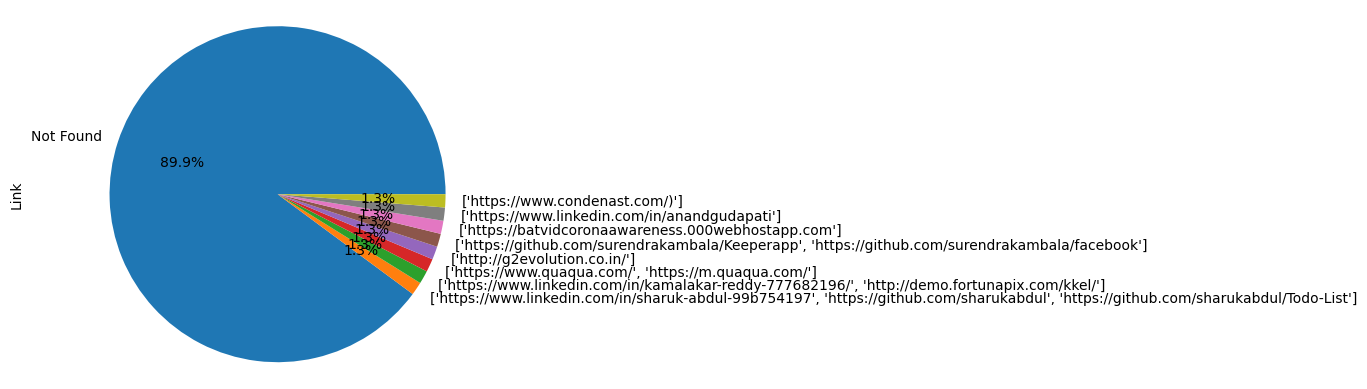

In [46]:
# Plot a pie chart
df['Link'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Display the chart
plt.axis('equal')
plt.show()

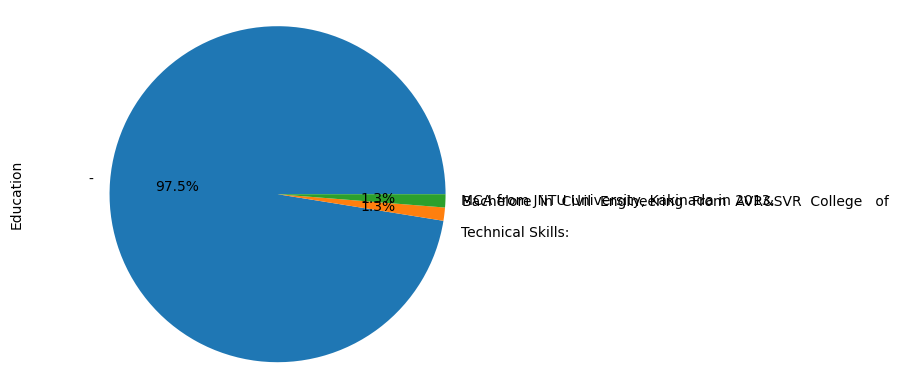

In [47]:
# Plot a pie chart
df['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Display the chart
plt.axis('equal')
plt.show()

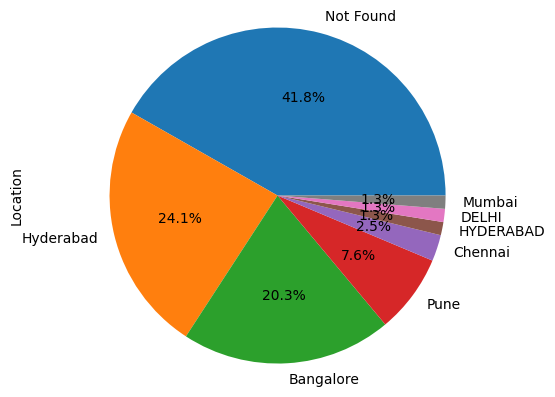

In [49]:
# Plot a pie chart
df['Location'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Display the chart
plt.axis('equal')
plt.show()

In [50]:
df['Resume_Details'].head()

0    ranga gaganam professional summary professiona...
1    khizaruddin rauf experience currently working ...
2    mareedu lokesh babu professional overview arou...
3    shaik abdul sharuk years experience wipro care...
4    kamalakar reddy linked professional summary ye...
Name: Resume_Details, dtype: object

Named Entity Recognition (NER)

In [51]:
import string
oneSetOfStopWords = set(nltk_stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 359), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('technical', 160), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('various', 146), ('role', 142), ('oracle', 142), ('developer', 139), ('environment', 139), ('responsibilities', 137), ('management', 136), ('security', 134), ('eib', 134), ('production', 133)]


Parts Of Speech (POS) Tagging

In [52]:
!python -m spacy download en_core_web_lg
import spacy
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

2023-08-22 17:56:07.784657: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [54]:
for token in doc_block[:30]:
    print(token,token.pos_)

rmation NOUN
application NOUN
different ADJ
stake NOUN
holders NOUN
like ADP
accountant NOUN
admin NOUN
doctor NOUN
lab NOUN
technician NOUN
physical ADJ
working NOUN
experience NOUN
working VERB
developer NOUN
metrolabs PROPN
services PROPN
pvt PROPN
ltd PROPN
july PROPN
present PROPN
technical ADJ
proficiency NOUN
web NOUN
technologies NOUN
html PROPN
javascript PROPN
bootstrap NOUN
libraries NOUN


Filtering out only the Nouns and Verbs from the Text to Tokens


In [55]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['summary', 'summary', 'years', 'experience', 'phases', 'software', 'development', 'cycle', 'react', 'developer', 'javascript', 'experience', 'experience', 'experience', 'design', 'configuration', 'implementation', 'development', 'maintenance', 'support', 'react', 'developer', 'meet', 'business', 'needs', 'working', 'knowledge', 'react', 'hooks', 'javascript', 'developing', 'user', 'facing', 'features', 'using', 'react', 'building', 'components', 'end', 'libraries', 'use', 'proficiency', 'javascript', 'including', 'dom', 'manipulation', 'understanding', 'react', 'core', 'principles', 'familiarity', 'specifications', 'learner', 'adopting', 'emerging', 'trends', 'addressing', 'industry', 'requirements', 'achieve', 'objectives', 'communication', 'presentation', 'skills', 'project', 'experience', 'project', 'experience', 'project', 'title', 'care', 'management', 'system', 'developer', 'technologies', 'summary', 'application', 'modules', 'employee', 'patients', 'admission', 'lab', 'manageme

Counting all the Nouns and Verbs present in the Tokens of words

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

Words  Count
0    experience    540
1   application    417
2         using    384
3       workday    351
4       reports    326
5          data    307
6       project    290
7      business    260
8        server    242
9           web    237
10      process    233
11     database    232
12       worked    215
13    knowledge    199
14     involved    191

Visualizing the Result of Top 30 Nouns and Verbs most Frequently


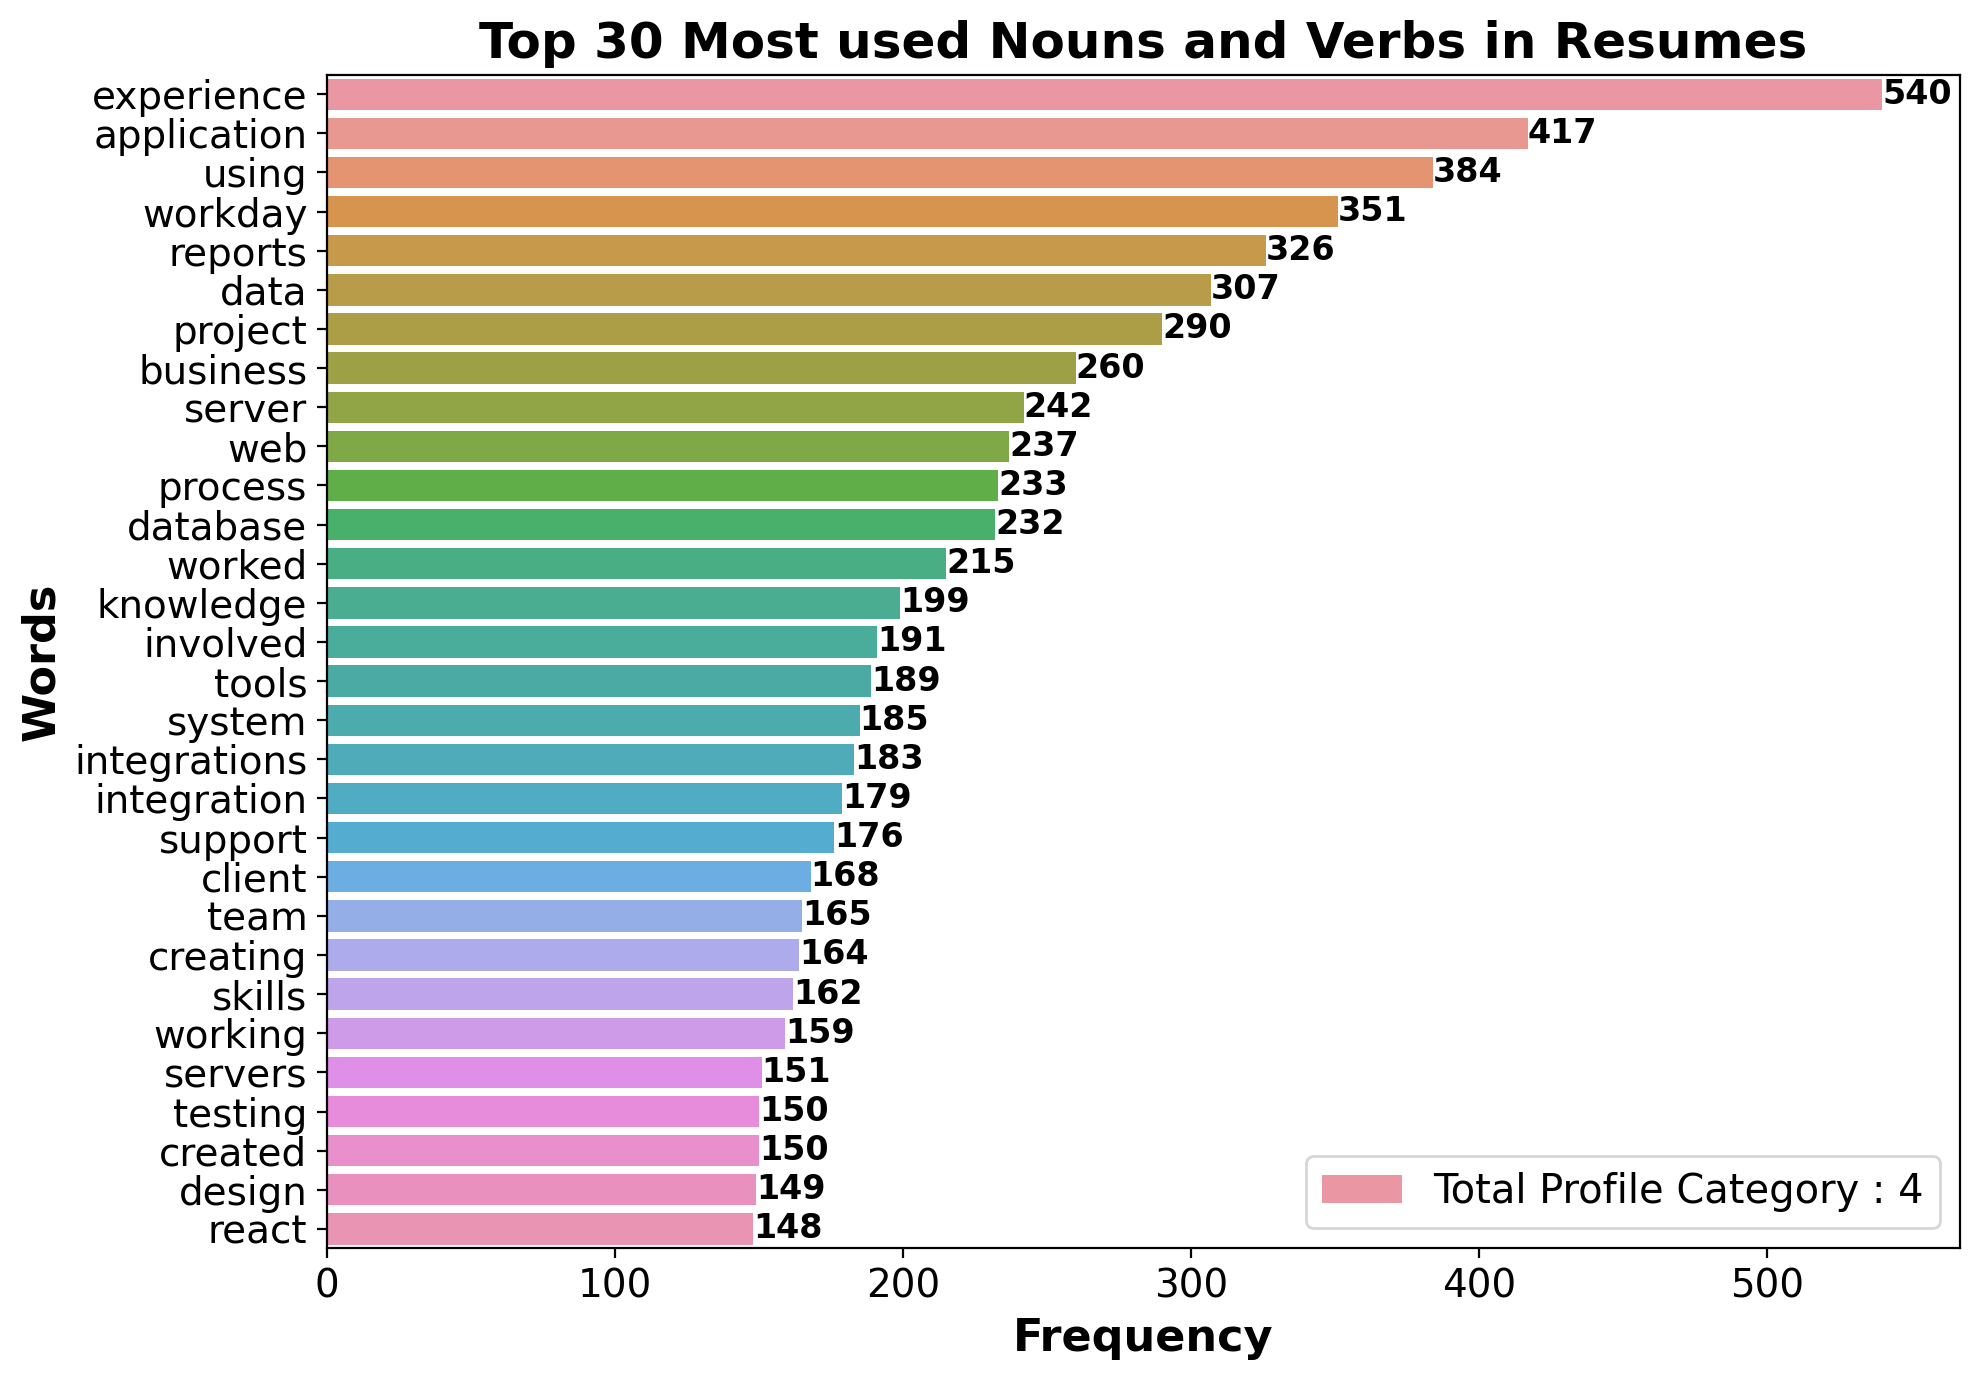

In [60]:
import seaborn as sns
from matplotlib import pylab
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(30), y= wd_df.Words.head(30), data= wd_df, ax = axe,
            label= 'Total Profile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 30 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('/content/drive/MyDrive/Project_Resume/Resumes/Top_Nouns_Verbs_Bar', dpi = 500)


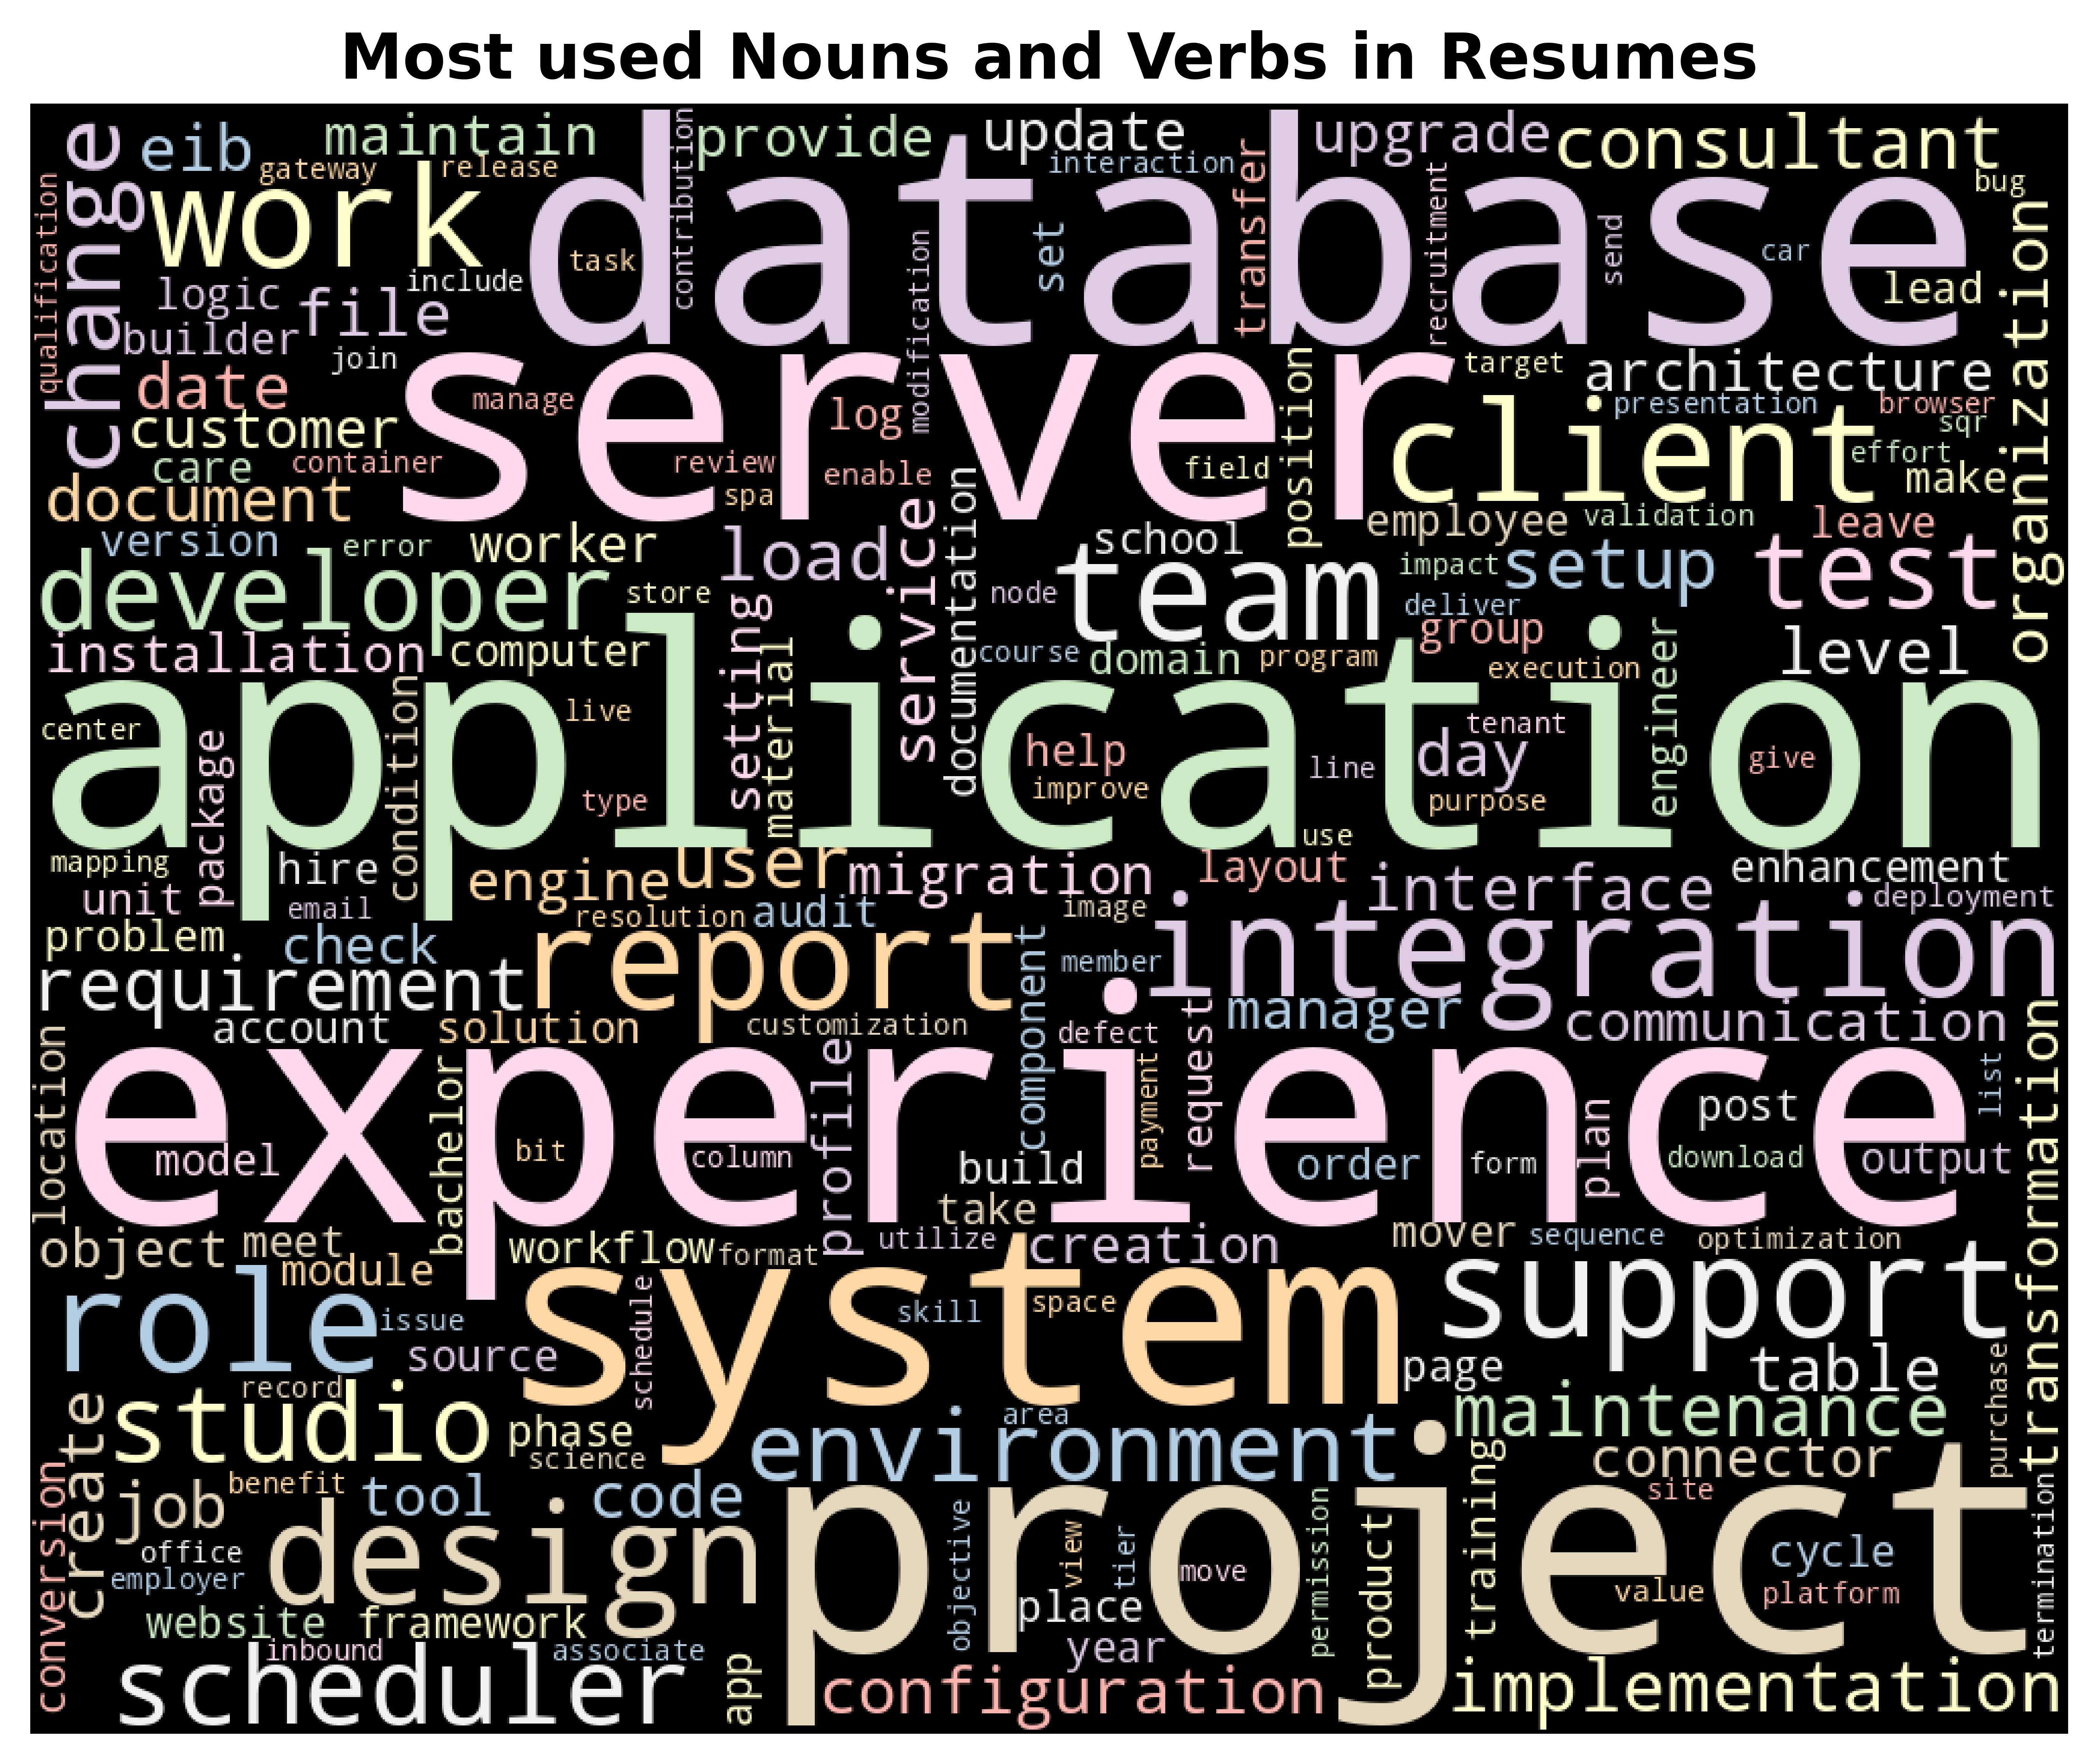

In [61]:
from wordcloud import WordCloud, STOPWORDS
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
word_cloud.to_file('/content/drive/MyDrive/Project_Resume/Resumes/Word_Clowds_Noun_Verb.png')
plt.show()

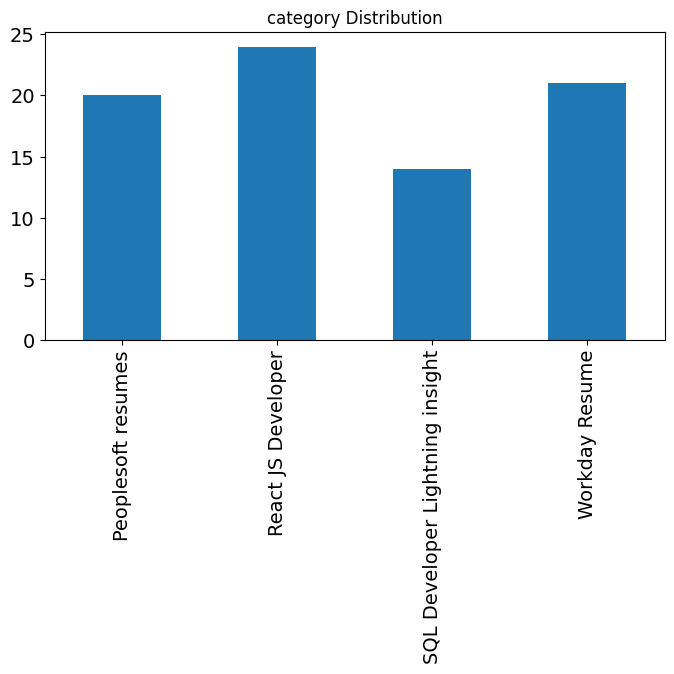

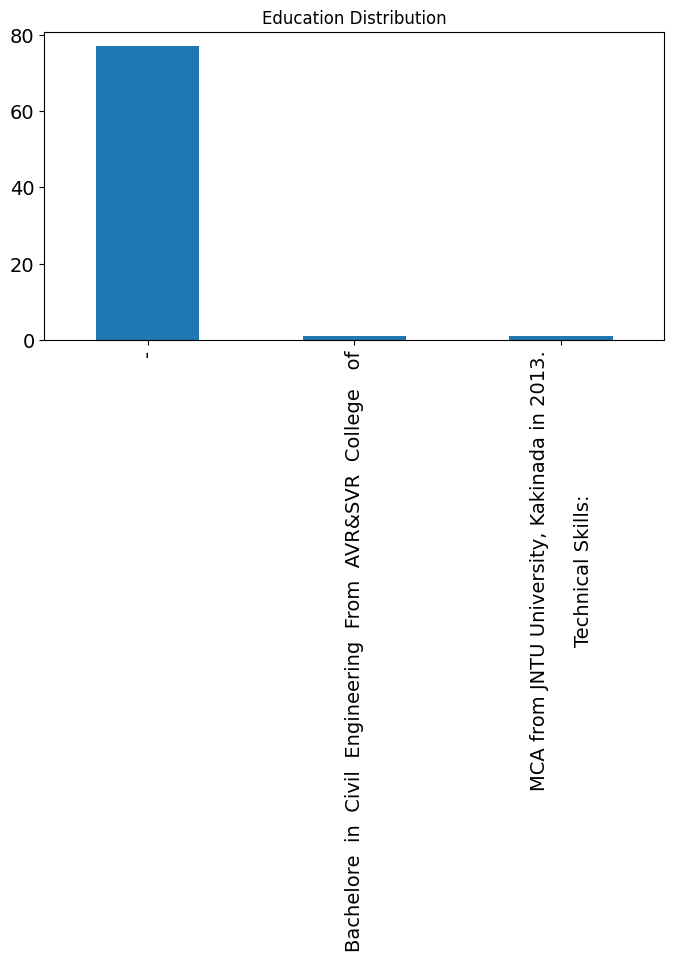

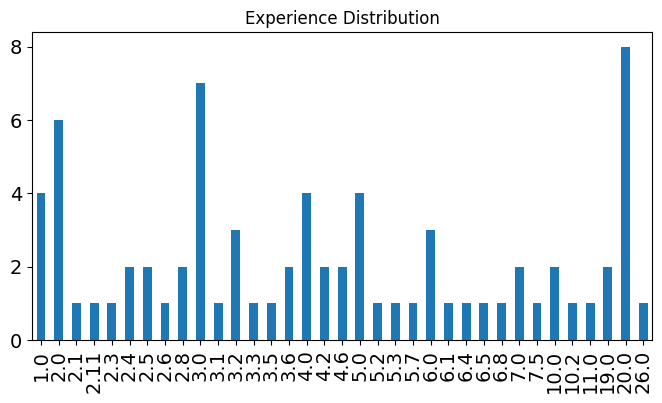

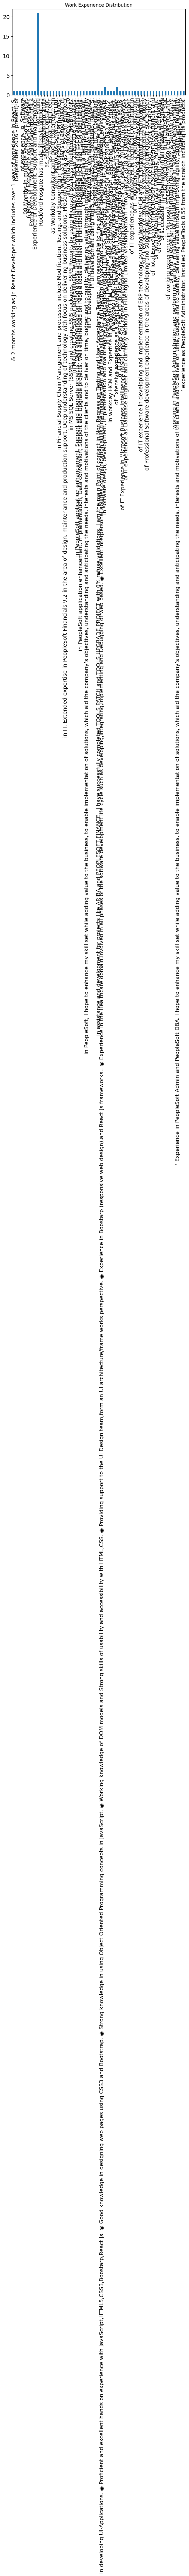

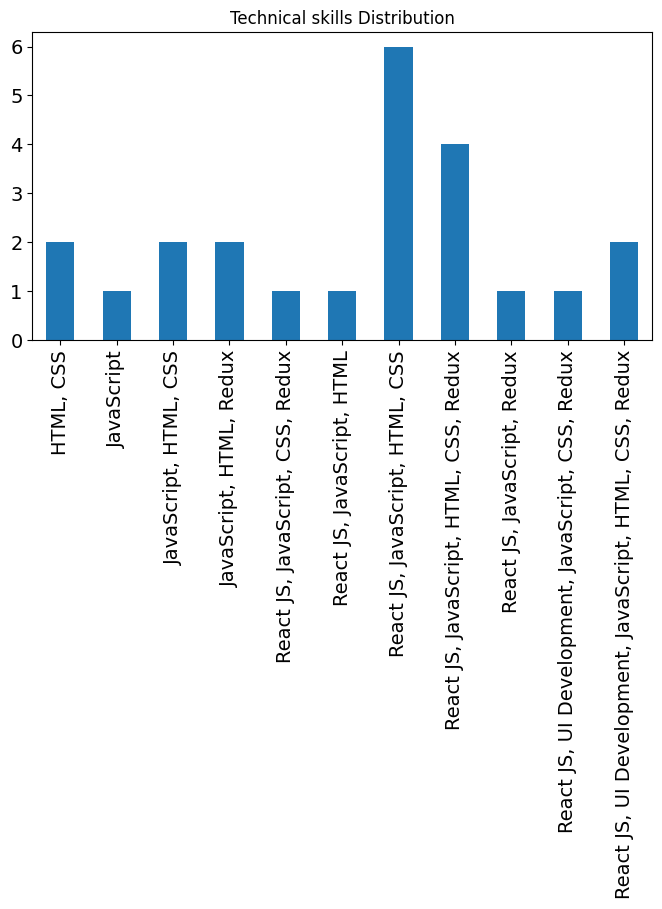

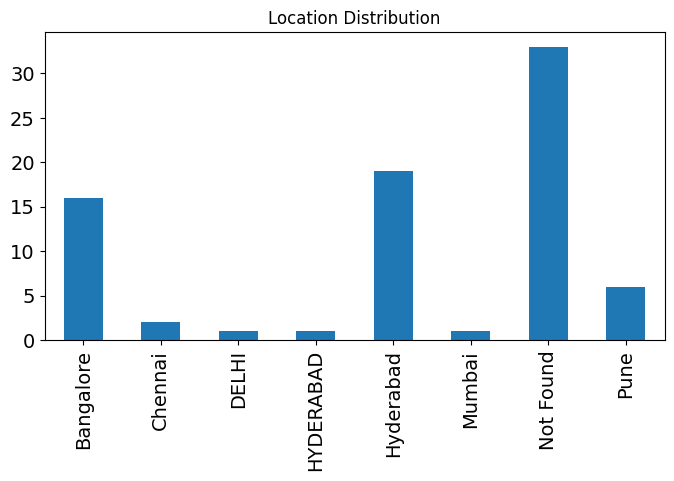

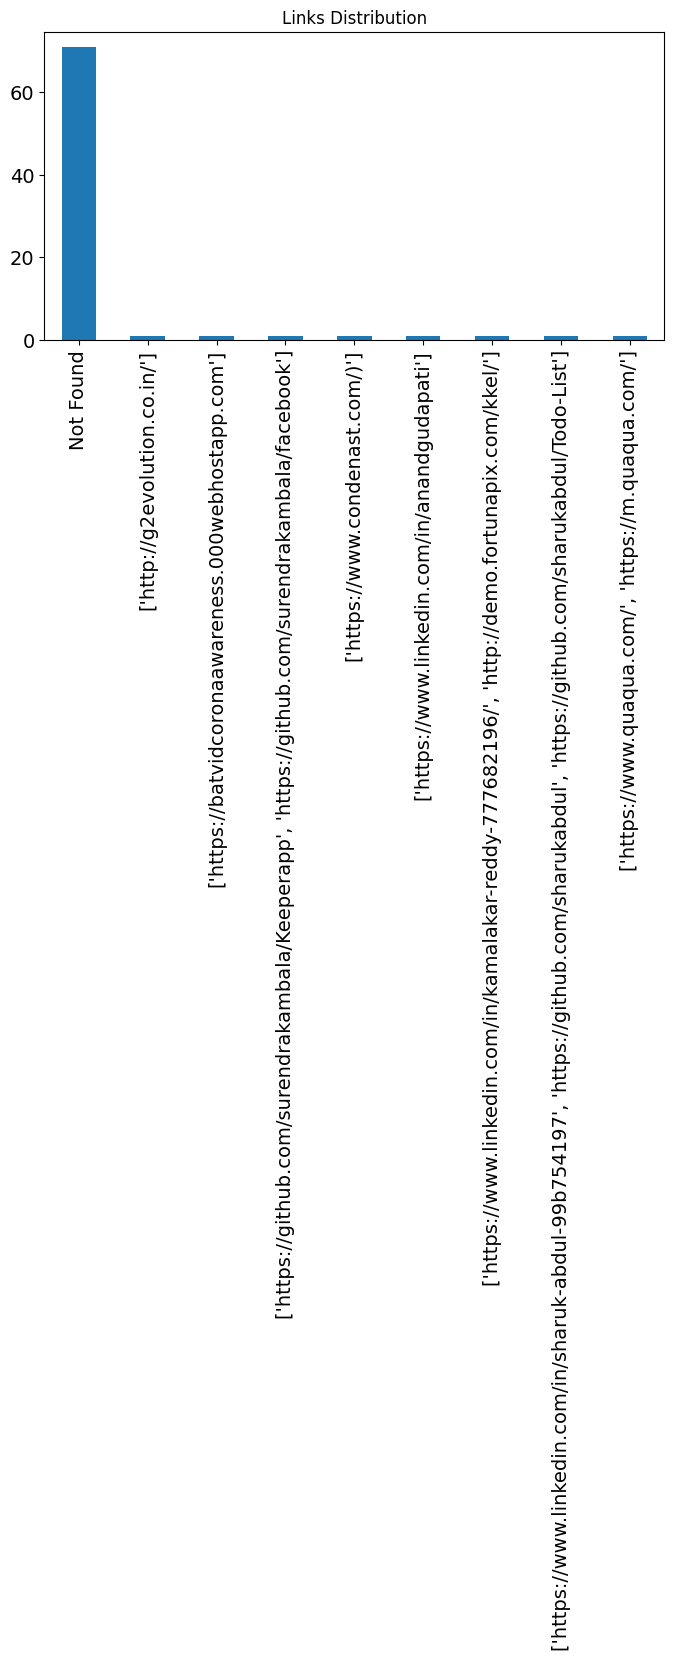

In [62]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(8, 4))
plt.title("category Distribution")
plt.show()
df['Education'].value_counts().sort_index().plot(kind='bar', figsize=(8, 4))
plt.title("Education Distribution")
plt.show()
df['Experience'].value_counts().sort_index().plot(kind='bar', figsize=(8, 4))
plt.title("Experience Distribution")
plt.show()
df['Work Experience'].value_counts().sort_index().plot(kind='bar', figsize=(8, 4))
plt.title("Work Experience Distribution")
plt.show()
df['Technical Skills'].value_counts().sort_index().plot(kind='bar', figsize=(8, 4))
plt.title("Technical skills Distribution")
plt.show()
df['Location'].value_counts().sort_index().plot(kind='bar', figsize=(8, 4))
plt.title("Location Distribution")
plt.show()
df['Link'].value_counts().sort_index().plot(kind='bar', figsize=(8, 4))
plt.title("Links Distribution")
plt.show()


In [64]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resume_Details'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

In [65]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline

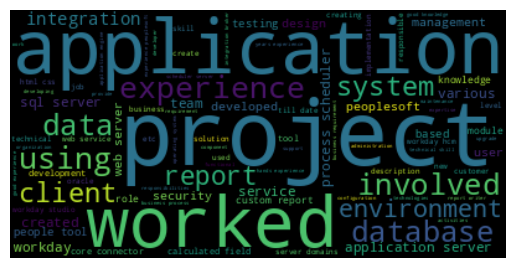

In [66]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define the desired color map
WORDCLOUD_COLOR_MAP = 'tab10_r'

# Set the desired color map
plt.set_cmap(WORDCLOUD_COLOR_MAP)

# Generate the word cloud
text_data = df['Resume_Details'].astype(str).str.cat(sep=' ')
wordcloud = WordCloud().generate(text_data)

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [67]:
categories = np.sort(df['Category'].unique())
categories

array(['Peoplesoft resumes', 'React JS Developer',
       'SQL Developer Lightning insight', 'Workday Resume'], dtype=object)

In [68]:
df_categories = [df[df['Category'] == category].loc[:, ['Resume_Details', 'Category']] for category in categories]
df_categories

[                                       Resume_Details            Category
 24  arun venu experience summary experience years ...  Peoplesoft resumes
 25  priyanka ramadoss mountpleasant coonoor nilgir...  Peoplesoft resumes
 26  classification internal classification interna...  Peoplesoft resumes
 27  rahul ahuja summary years experience peoplesof...  Peoplesoft resumes
 28  priyabrata hota career objective pursuing peop...  Peoplesoft resumes
 29  sirazuddin bangalore india sirazuddin bangalor...  Peoplesoft resumes
 30  tanna sujatha objective seeking challenging ro...  Peoplesoft resumes
 31  peoplesoft admin peoplesoft dba ganesh alladi ...  Peoplesoft resumes
 32  peoplesoft administration vivekanand sayana ca...  Peoplesoft resumes
 33  anubhav kumar singh core competencies scriptin...  Peoplesoft resumes
 34  profile summary years experience implementing ...  Peoplesoft resumes
 35  vinod akkala peoplesoft dba admin professional...  Peoplesoft resumes
 36  peoplesoft administr

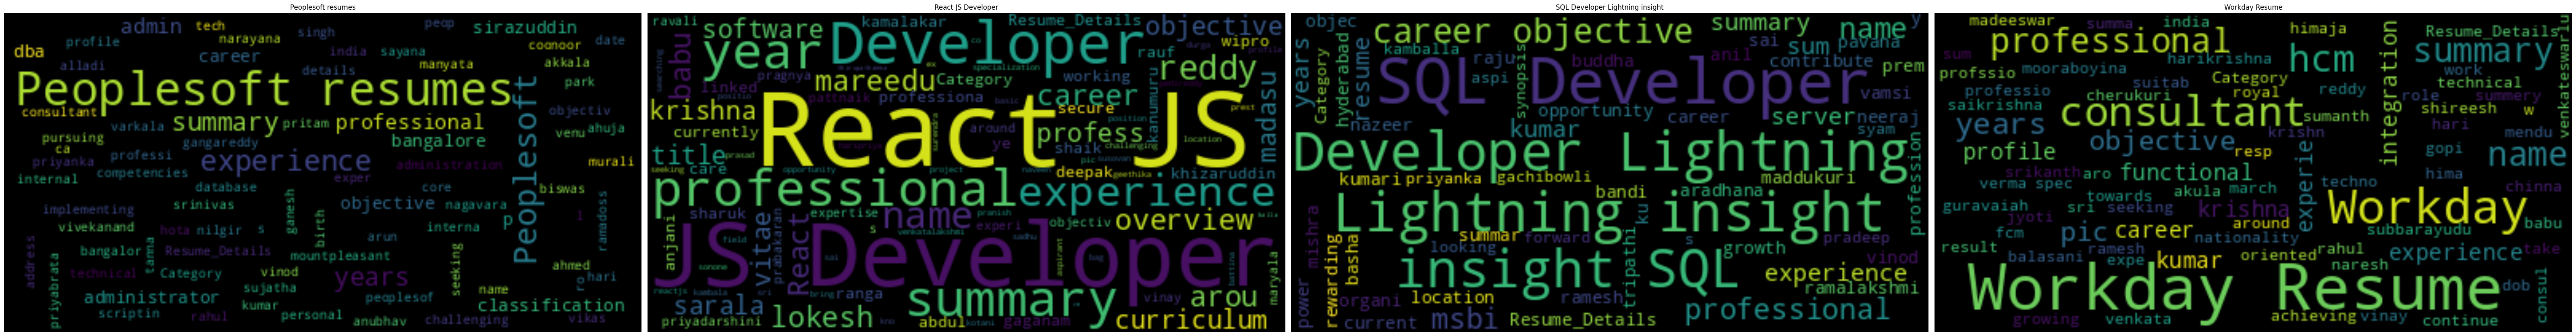

In [69]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.figure(figsize=(80, 60))

# Define the desired color map
WORDCLOUD_COLOR_MAP = 'tab10_r'

# Set the desired color map
plt.set_cmap(WORDCLOUD_COLOR_MAP)

# Generate word clouds for each category
for i, Category in enumerate(categories):
    wc_category = WordCloud().generate(str(df_categories[i]))

    plt.subplot(5, 5, i + 1).set_title(Category)
    plt.imshow(wc_category, interpolation='bilinear')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [70]:
def wordfreq(df):
    count = df['Resume_Details'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']
    return count.head(10)

In [71]:
word_frequency = wordfreq(df)
print(word_frequency)

          Word  Frequency
0   experience        598
1   peoplesoft        453
2      workday        431
3  application        418
4        using        395
5       server        359
6         data        332
7      project        326
8      reports        326
9          sql        280


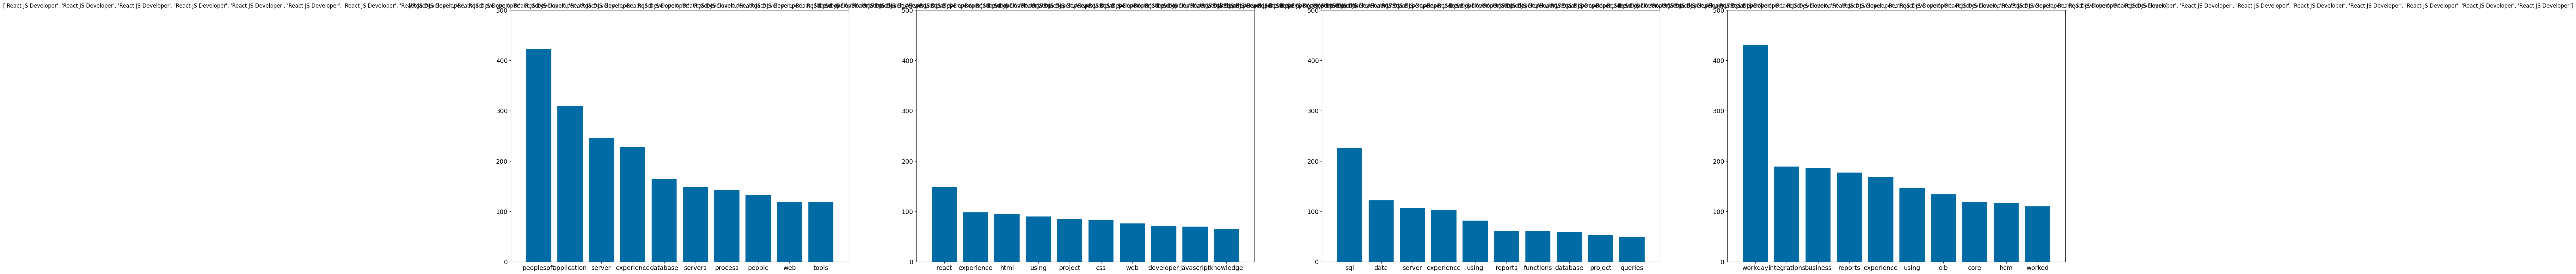

In [72]:
fig = plt.figure(figsize=(80, 60))

for i, Category in enumerate(categories):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 500)

plt.show()
plt.close()

In [73]:
df=pd.read_csv("/content/finalCleaned_Resumesnlp.csv")
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(0,8):
    df.iloc[:,i]=le.fit_transform(df.iloc[:,i])
print(df)


    Category  Name  Education  Experience  Work Experience  Technical Skills  \
0          1    54          0           0                8                 3   
1          1    30          0          33                8                10   
2          1    29          0           1               30                 6   
3          1    57          0           1               55                 8   
4          1    22          0          35               25                10   
..       ...   ...        ...         ...              ...               ...   
74         3    69          0          15               13                11   
75         3    53          0          18                8                11   
76         3    21          0           9               27                11   
77         3    15          0          29                2                11   
78         3    68          0          20               16                11   

    Location  Link                     

<ipython-input-73-1c69b88bdc59>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,i]=le.fit_transform(df.iloc[:,i])
<ipython-input-73-1c69b88bdc59>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,i]=le.fit_transform(df.iloc[:,i])
<ipython-input-73-1c69b88bdc59>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, 

In [74]:
df

Category  Name  Education  Experience  Work Experience  Technical Skills  \
0          1    54          0           0                8                 3   
1          1    30          0          33                8                10   
2          1    29          0           1               30                 6   
3          1    57          0           1               55                 8   
4          1    22          0          35               25                10   
..       ...   ...        ...         ...              ...               ...   
74         3    69          0          15               13                11   
75         3    53          0          18                8                11   
76         3    21          0           9               27                11   
77         3    15          0          29                2                11   
78         3    68          0          20               16                11   

    Location  Link                                     Resume_Details  
0          4     0  ranga gaganam professional summary professiona...  
1          7     0  khizaruddin rauf experience currently working ...  
2          6     0  mareedu lokesh babu professional overview arou...  
3          6     7  shaik abdul sharuk years experience wipro care...  
4          3     6  kamalakar reddy linked professional summary ye...  
..       ...   ...                                                ...  
74         6     0  workday integration consultant name sri krishn...  
75         6     0  ramesh workday hcm consultant professional sum...  
76         4     0  jyoti verma professional summary professional ...  
77         4     0  shireesh balasani hcm consultant profile summa...  
78         0     0  venkateswarlu workday consultant years experie...  

[79 rows x 9 columns]

In [75]:
df.value_counts()

Category  Name  Education  Experience  Work Experience  Technical Skills  Location  Link  Resume_Details                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

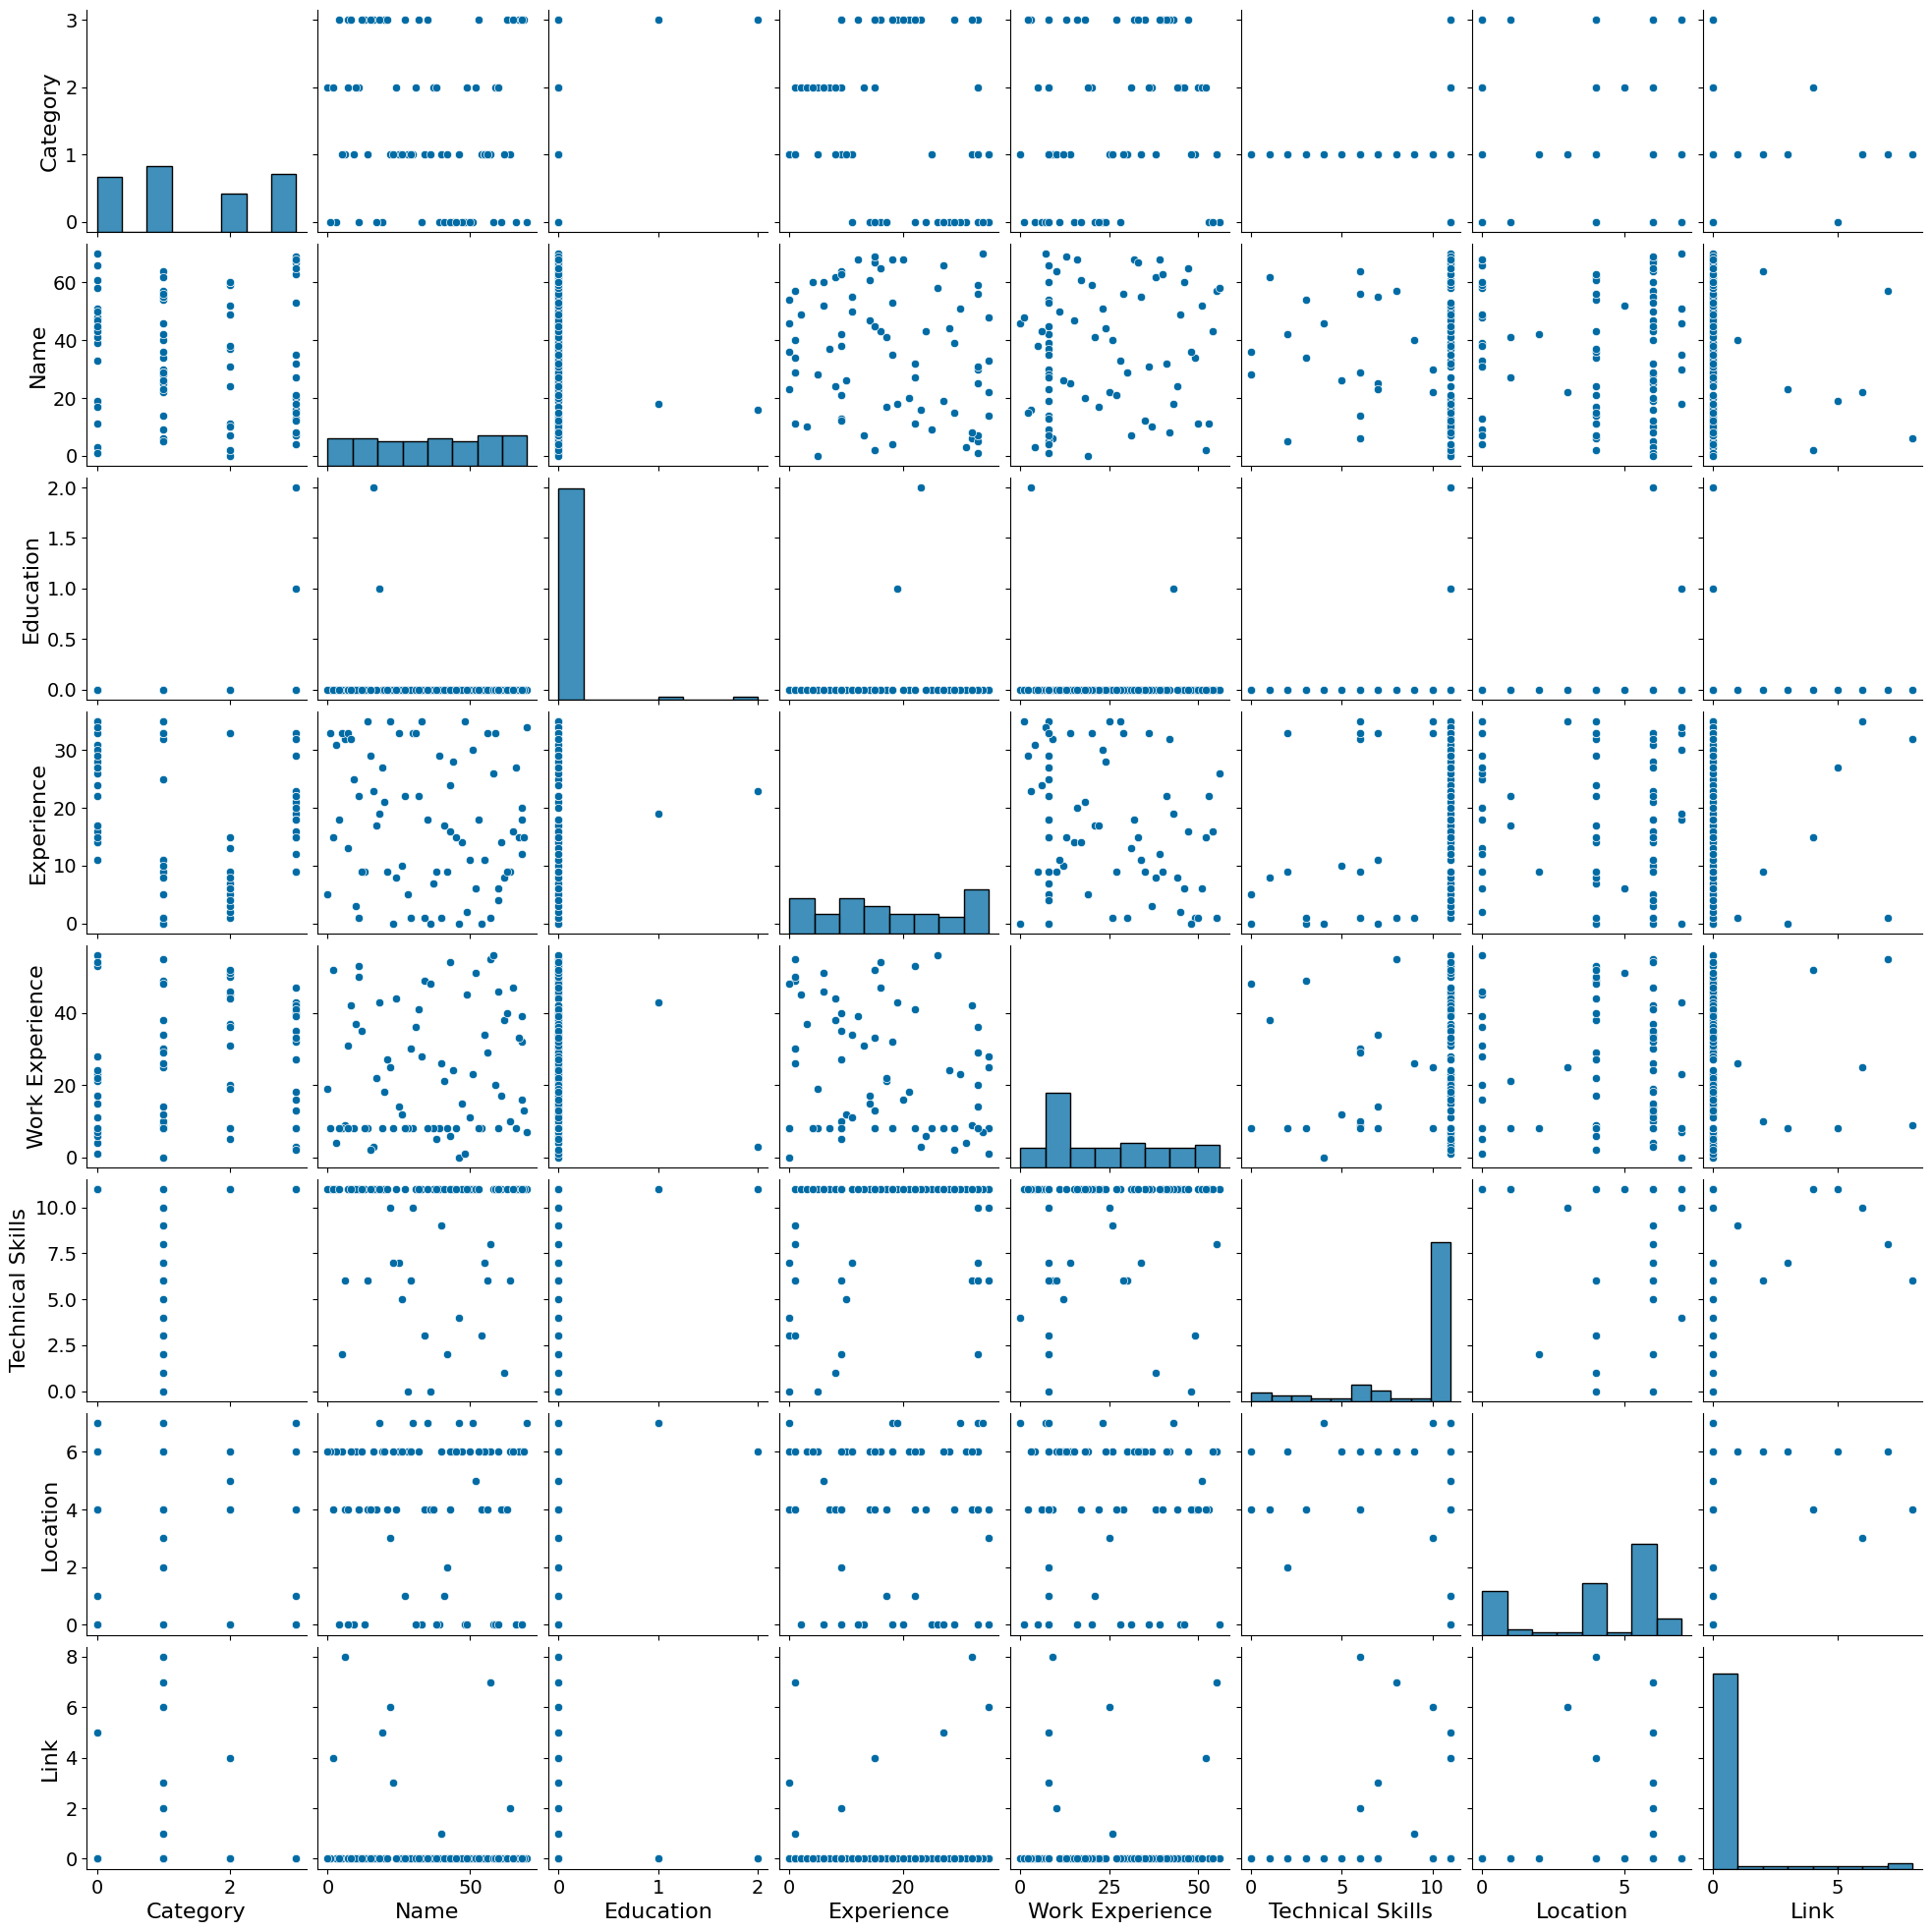

In [76]:
import seaborn as sns
sns.pairplot(data = df)

<Axes: xlabel='count', ylabel='Category'>

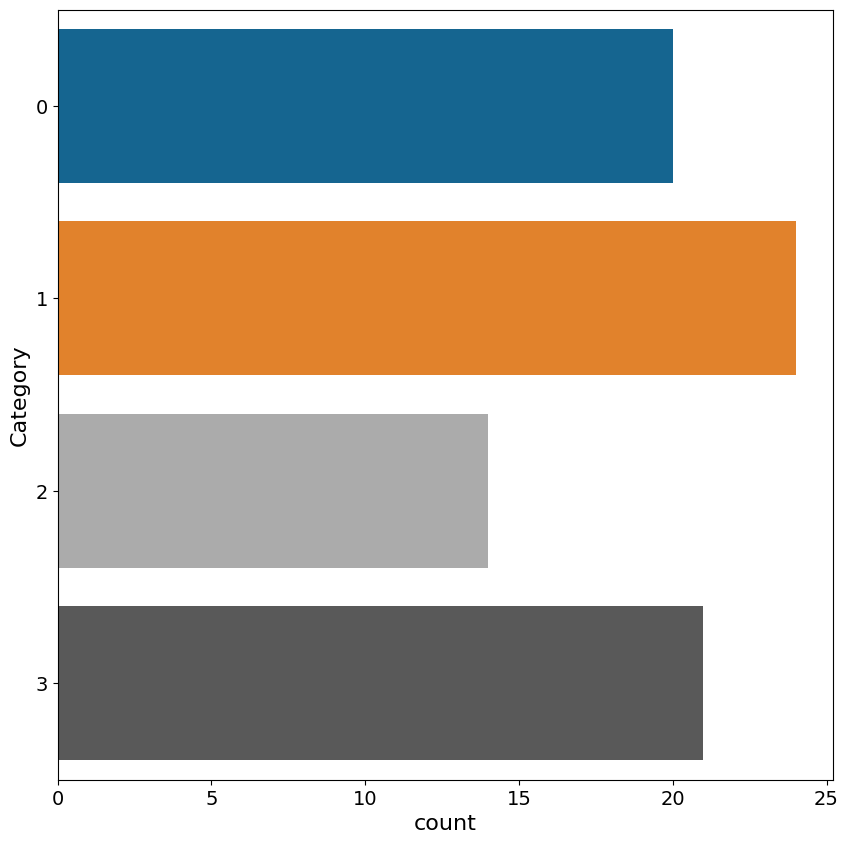

In [77]:
plt.figure(figsize=(10,10))
plt.xticks()
sns.countplot(y="Category", data=df)

In [78]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [79]:
from nltk.stem import WordNetLemmatizer

# Create an instance of the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize words
def lemmatize_words(words):
    lem_words = [lemmatizer.lemmatize(word) for word in words]
    return lem_words

# Apply the lemmatization function to a list of words
words_list = df['Resume_Details']
lemmatized_words = lemmatize_words(words_list)
print(lemmatized_words)


['ranga gaganam professional summary professional summary years successful experience phases software development life cycle sdlc react developer javascript professional experience professional experience experience design configuration implementation development maintenance support react developer meet business needs good working knowledge react hooks javascript html developing new user facing features using react building reusable components front end libraries future use strong proficiency javascript including dom manipulation thorough understanding react core principles familiarity newer specifications ecma script proactive learner adopting emerging trends addressing industry requirements achieve organizational objectives good communication presentation interpersonal skills project experience project experience project title care management system organizer metrolabs services pvt ltd designation junior developer technologies reactjs html css javascript summary application several m

In [80]:

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
requiredText = df['Resume_Details'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")
WordFeatures

Feature completed .....


<79x4351 sparse matrix of type '<class 'numpy.float64'>'
	with 19463 stored elements in Compressed Sparse Row format>

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=30, test_size=0.20, shuffle = True, stratify=requiredTarget)
X_train.shape, X_test.shape

((63, 4351), (16, 4351))

In [82]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


Accuracy of Decision Tree Classifier on training set: 1.0000
Accuracy of Decision Tree Classifier on test set    : 0.8750

 Classification report for Decision Tree Classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.71      1.00      0.83         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.93      0.85      0.87        16
weighted avg       0.91      0.88      0.87        16


Accuracy Score   :  0.875
Precision Score  :  0.9286
Recall Score     :  0.8542
f1-Score         :  0.8726
Confusion Matrix :
 [[3 1 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


Text(90.72222222222221, 0.5, 'Truth')

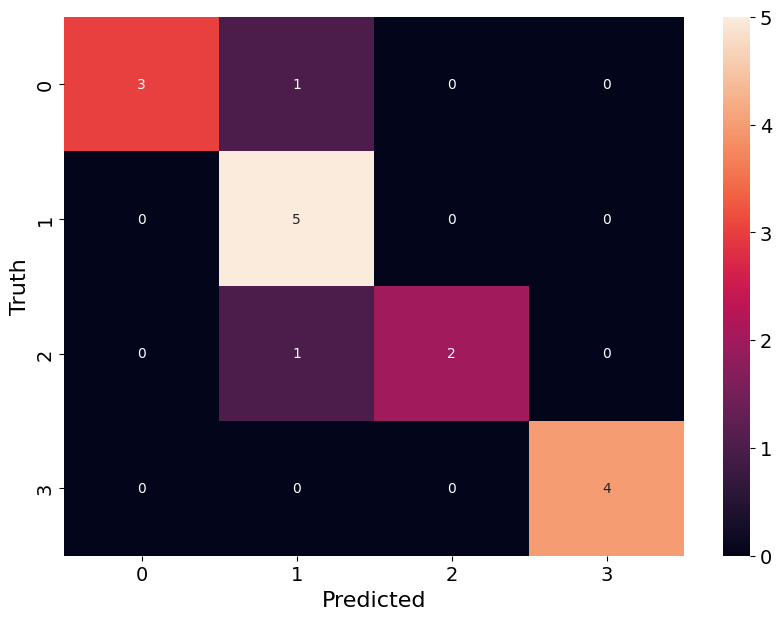

In [83]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
prediction_1 = rf_clf.predict(X_test)
print('Accuracy of Decision Tree Classifier on training set: {:.4f}'.format(rf_clf.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set    : {:.4f}'.format(rf_clf.score(X_test, y_test)))
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
from sklearn import metrics
print("\n Classification report for Decision Tree Classifier %s:\n%s\n" % (rf_clf, metrics.classification_report(y_test, prediction_1)))
accuracy_1 = round(accuracy_score(y_test,prediction_1),4)
precision_1 = round(precision_score(y_test,prediction_1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,prediction_1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,prediction_1, average = 'macro'),4)
print('Accuracy Score   : ', accuracy_1)
print('Precision Score  : ', precision_1)
print('Recall Score     : ', recall_1)
print('f1-Score         : ', f1_1)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_1))
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test ,prediction_1 )
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy of Support Vector Classifier on training set: 1.0000
Accuracy of Support Vector Classifier on test set    : 0.8750

 Classification report for Support vector Classifier SVC():
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.71      1.00      0.83         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.93      0.85      0.87        16
weighted avg       0.91      0.88      0.87        16


Accuracy Score   :  0.875
Precision Score  :  0.9286
Recall Score     :  0.8542
f1-Score         :  0.8726
Confusion Matrix :
 [[3 1 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


Text(90.72222222222221, 0.5, 'Truth')

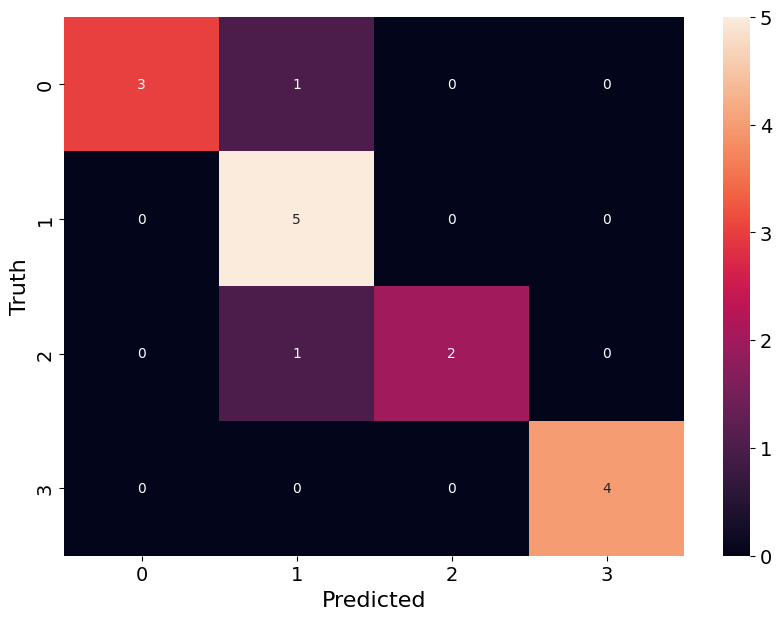

In [84]:
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
prediction_2 = sv_clf.predict(X_test)
print('Accuracy of Support Vector Classifier on training set: {:.4f}'.format(sv_clf.score(X_train, y_train)))
print('Accuracy of Support Vector Classifier on test set    : {:.4f}'.format(sv_clf.score(X_test, y_test)))
print("\n Classification report for Support vector Classifier %s:\n%s\n" % (sv_clf, metrics.classification_report(y_test, prediction_2)))
accuracy_2 = round(accuracy_score(y_test,prediction_2),4)
precision_2 = round(precision_score(y_test,prediction_2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,prediction_2, average = 'macro'),4)
f1_2 = round(f1_score(y_test,prediction_2, average = 'macro'),4)
print('Accuracy Score   : ', accuracy_2)
print('Precision Score  : ', precision_2)
print('Recall Score     : ', recall_2)
print('f1-Score         : ', f1_2)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_2))
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test ,prediction_2)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy of Multinomial NB Classifier on training set: 1.0000
Accuracy of Multinomial NB Classifier on test set    : 0.9375

 Classification report for multinomialNB Classifier MultinomialNB():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.92      0.93        16
weighted avg       0.95      0.94      0.93        16


Accuracy Score   :  0.9375
Precision Score  :  0.9583
Recall Score     :  0.9167
f1-Score         :  0.9273
Confusion Matrix :
 [[4 0 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


Text(90.72222222222221, 0.5, 'Truth')

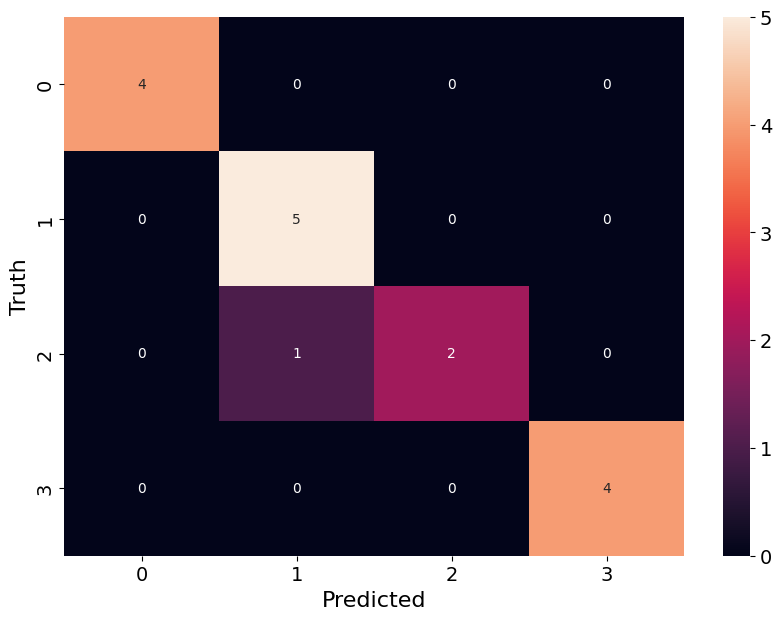

In [85]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
prediction_3 = nb_clf.predict(X_test)
print('Accuracy of Multinomial NB Classifier on training set: {:.4f}'.format(nb_clf.score(X_train, y_train)))
print('Accuracy of Multinomial NB Classifier on test set    : {:.4f}'.format(nb_clf.score(X_test, y_test)))
print("\n Classification report for multinomialNB Classifier %s:\n%s\n" % (nb_clf, metrics.classification_report(y_test, prediction_3)))
accuracy_3= round(accuracy_score(y_test,prediction_3),4)
precision_3 = round(precision_score(y_test,prediction_3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,prediction_3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,prediction_3, average = 'macro'),4)
print('Accuracy Score   : ', accuracy_3)
print('Precision Score  : ', precision_3)
print('Recall Score     : ', recall_3)
print('f1-Score         : ', f1_3)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_3))
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test ,prediction_3)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy of Logistic Regression Classifier on training set: 1.0000
Accuracy of Logistic Regression Classifier on test set    : 0.8750

 Classification report for Logistic Classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.71      1.00      0.83         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.93      0.85      0.87        16
weighted avg       0.91      0.88      0.87        16


Accuracy Score   :  0.875
Precision Score  :  0.9286
Recall Score     :  0.8542
f1-Score         :  0.8726
Confusion Matrix :
 [[3 1 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


Text(90.72222222222221, 0.5, 'Truth')

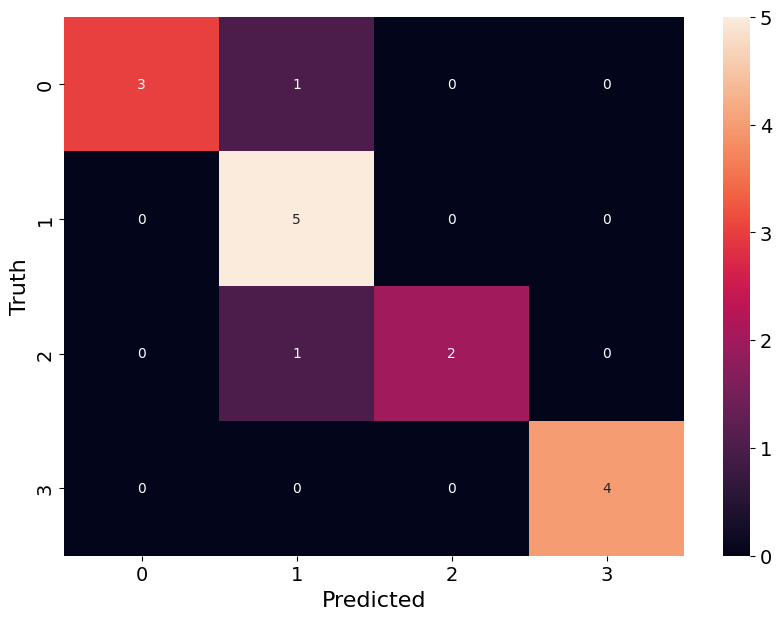

In [86]:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
prediction_4 = logistic_clf.predict(X_test)
print('Accuracy of Logistic Regression Classifier on training set: {:.4f}'.format(logistic_clf.score(X_train, y_train)))
print('Accuracy of Logistic Regression Classifier on test set    : {:.4f}'.format(logistic_clf.score(X_test, y_test)))
print("\n Classification report for Logistic Classifier %s:\n%s\n" % (logistic_clf, metrics.classification_report(y_test, prediction_4)))
accuracy_4= round(accuracy_score(y_test,prediction_4),4)
precision_4 = round(precision_score(y_test,prediction_4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,prediction_4, average = 'macro'),4)
f1_4 = round(f1_score(y_test,prediction_4, average = 'macro'),4)
print('Accuracy Score   : ', accuracy_4)
print('Precision Score  : ', precision_4)
print('Recall Score     : ', recall_4)
print('f1-Score         : ', f1_4)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_4))
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test ,prediction_4)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy of AdaBoost Classifier on training set: 0.7460
Accuracy of AdaBoost Classifier on test set    : 0.7500

 Classification report for AdaBoost Classifier AdaBoostClassifier():
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.56      1.00      0.71         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.75        16
   macro avg       0.64      0.75      0.68        16
weighted avg       0.61      0.75      0.66        16


Accuracy Score   :  0.75
Precision Score  :  0.6389
Recall Score     :  0.75
f1-Score         :  0.6786
Confusion Matrix :
 [[0 4 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Text(90.72222222222221, 0.5, 'Truth')

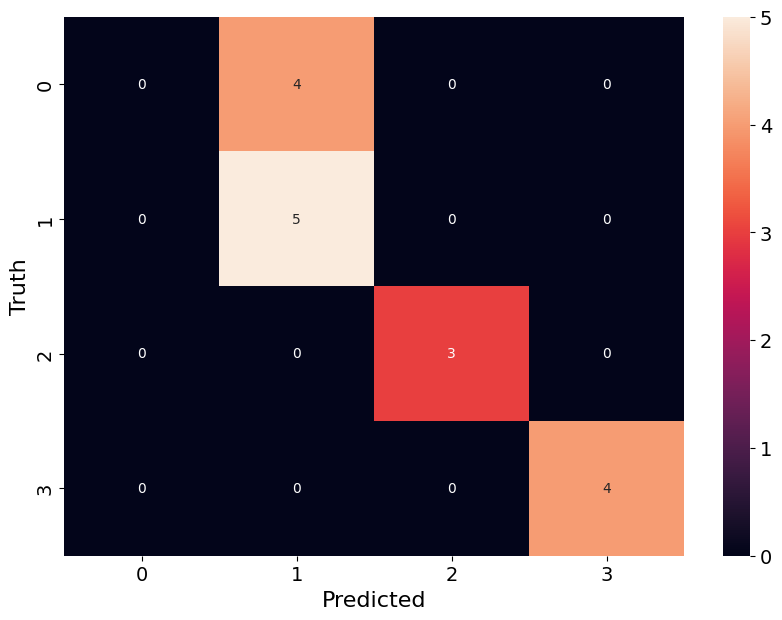

In [87]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)
prediction_5 = ab_clf.predict(X_test)
print('Accuracy of AdaBoost Classifier on training set: {:.4f}'.format(ab_clf.score(X_train, y_train)))
print('Accuracy of AdaBoost Classifier on test set    : {:.4f}'.format(ab_clf.score(X_test, y_test)))

print("\n Classification report for AdaBoost Classifier %s:\n%s\n" % (ab_clf, metrics.classification_report(y_test, prediction_5)))
accuracy_5= round(accuracy_score(y_test,prediction_5),4)
precision_5 = round(precision_score(y_test,prediction_5,average = 'macro'),4)
recall_5= round(recall_score(y_test,prediction_5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,prediction_5, average = 'macro'),4)
print('Accuracy Score   : ', accuracy_5)
print('Precision Score  : ', precision_5)
print('Recall Score     : ', recall_5)
print('f1-Score         : ', f1_5)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_5))
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test ,prediction_5)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Accuracy of GradientBoosting Classifier on training set: 1.0000
Accuracy of GradientBoosting Classifier on test set    : 1.0000

 Classification report for GradientBoosting Classifier GradientBoostingClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


Accuracy Score   :  1.0
Precision Score  :  1.0
Recall Score     :  1.0
f1-Score         :  1.0
Confusion Matrix :
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(90.72222222222221, 0.5, 'Truth')

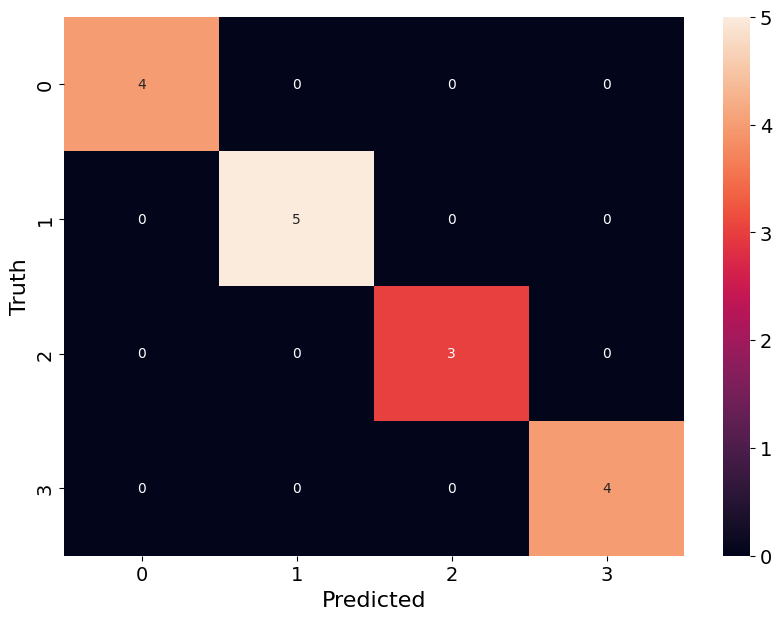

In [88]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
prediction_6 = gb_clf.predict(X_test)
print('Accuracy of GradientBoosting Classifier on training set: {:.4f}'.format(gb_clf.score(X_train, y_train)))
print('Accuracy of GradientBoosting Classifier on test set    : {:.4f}'.format(gb_clf.score(X_test, y_test)))

print("\n Classification report for GradientBoosting Classifier %s:\n%s\n" % (gb_clf, metrics.classification_report(y_test, prediction_6)))
accuracy_6= round(accuracy_score(y_test,prediction_6),4)
precision_6 = round(precision_score(y_test,prediction_6,average = 'macro'),4)
recall_6= round(recall_score(y_test,prediction_6, average = 'macro'),4)
f1_6 = round(f1_score(y_test,prediction_6, average = 'macro'),4)
print('Accuracy Score   : ', accuracy_6)
print('Precision Score  : ', precision_6)
print('Recall Score     : ', recall_6)
print('f1-Score         : ', f1_6)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_6))
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test ,prediction_6)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1731
[LightGBM] [Info] Number of data points in the train set: 63, number of used features: 143
[LightGBM] [Info] Start training from score -1.370546
[LightGBM] [Info] Start training from score -1.198696
[LightGBM] [Info] Start training from score -1.745239
[LightGBM] [Info] Start training from score -1.309921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

Text(90.72222222222221, 0.5, 'Truth')

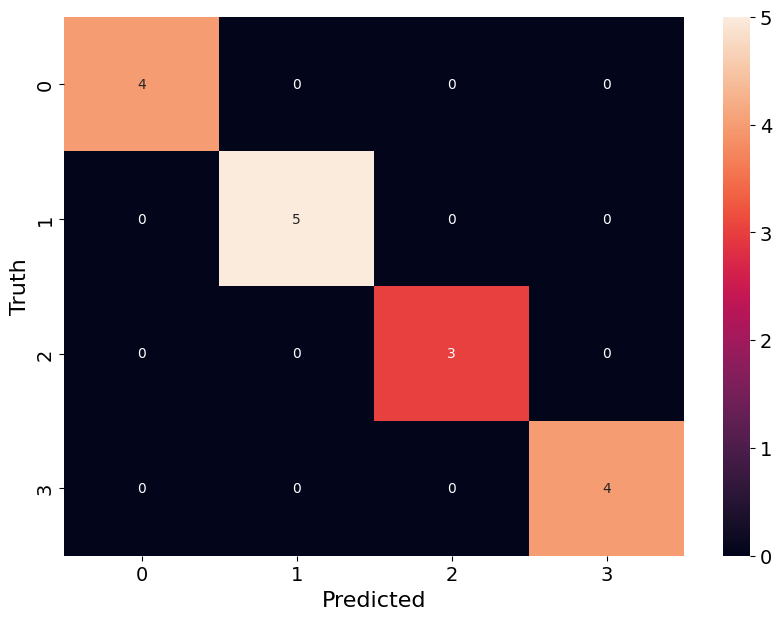

In [89]:
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)
prediction_7 = lgb_clf.predict(X_test)
print('Accuracy of LightGradientBoosting Classifier on training set: {:.4f}'.format(lgb_clf.score(X_train, y_train)))
print('Accuracy of LightGradientBoosting Classifier on test set    : {:.4f}'.format(lgb_clf.score(X_test, y_test)))
print("\n Classification report for GradientBoosting Classifier %s:\n%s\n" % (lgb_clf, metrics.classification_report(y_test, prediction_7)))
accuracy_7= round(accuracy_score(y_test,prediction_7),4)
precision_7 = round(precision_score(y_test,prediction_7,average = 'macro'),4)
recall_7= round(recall_score(y_test,prediction_7, average = 'macro'),4)
f1_7 = round(f1_score(y_test,prediction_7, average = 'macro'),4)
print('Accuracy Score   : ', accuracy_7)
print('Precision Score  : ', precision_7)
print('Recall Score     : ', recall_7)
print('f1-Score         : ', f1_7)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_7))
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test ,prediction_7)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy of Bagging Classifier Classifier on training set: 1.0000
Accuracy of Bagging Classifier Classifier on test set    : 1.0000

 Classification report for Bagging Classifier BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=8):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


Accuracy Score   :  1.0
Precision Score  :  1.0
Recall Score     :  1.0
f1-Score         :  1.0
Confusion Matrix :
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(90.72222222222221, 0.5, 'Truth')

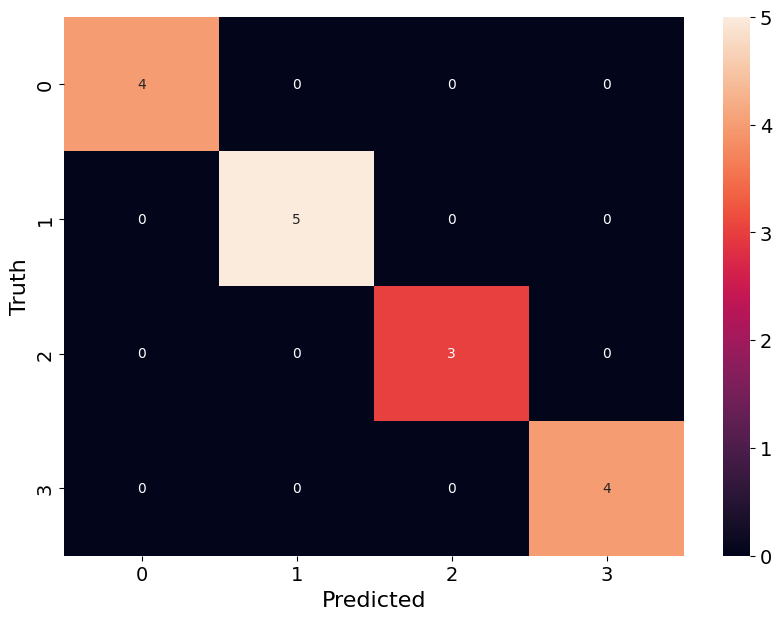

In [90]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
bg_clf = BaggingClassifier(base_estimator=cart,n_estimators=10,random_state=8)
bg_clf.fit(X_train , y_train)
#Predict for X test dataset
prediction_8 = bg_clf.predict(X_test)
print('Accuracy of Bagging Classifier Classifier on training set: {:.4f}'.format(bg_clf.score(X_train, y_train)))
print('Accuracy of Bagging Classifier Classifier on test set    : {:.4f}'.format(bg_clf.score(X_test, y_test)))
print("\n Classification report for Bagging Classifier %s:\n%s\n" % (bg_clf, metrics.classification_report(y_test, prediction_8)))
accuracy_8= round(accuracy_score(y_test,prediction_8),4)
precision_8 = round(precision_score(y_test,prediction_8,average = 'macro'),4)
recall_8= round(recall_score(y_test,prediction_8, average = 'macro'),4)
f1_8 = round(f1_score(y_test,prediction_8, average = 'macro'),4)
print('Accuracy Score   : ', accuracy_8)
print('Precision Score  : ', precision_8)
print('Recall Score     : ', recall_8)
print('f1-Score         : ', f1_8)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_8))
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test ,prediction_8)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

0.9547619047619047
Accuracy of knn Classifier Classifier on training set: 0.9683
Accuracy of knn Classifier Classifier on test set    : 0.8750

 Classification report for knn Classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       0.67      1.00      0.80         4

    accuracy                           0.88        16
   macro avg       0.92      0.88      0.87        16
weighted avg       0.92      0.88      0.87        16


Accuracy Score   :  0.875
Precision Score  :  0.9167
Recall Score     :  0.875
f1-Score         :  0.8667
Confusion Matrix :
 [[2 0 0 2]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


Text(90.72222222222221, 0.5, 'Truth')

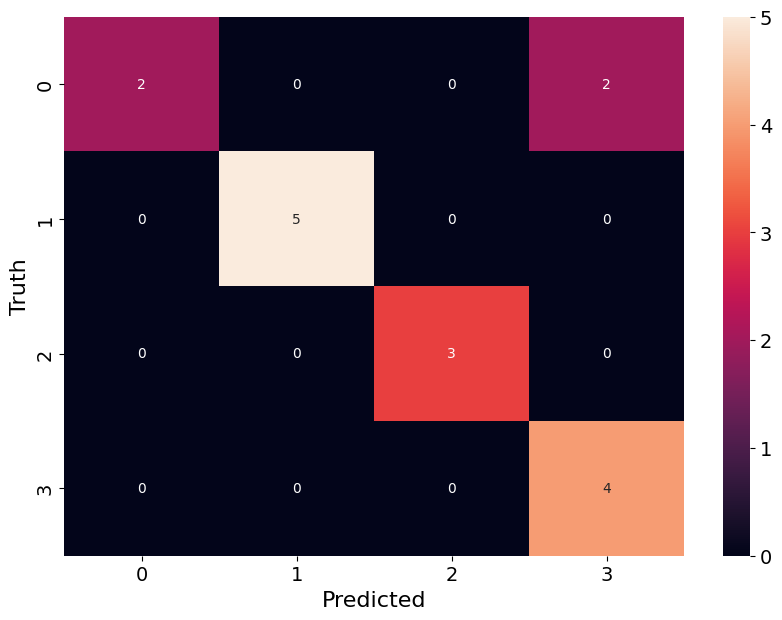

In [91]:
#KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors  import KNeighborsClassifier
kfold = KFold(n_splits=10)
knn_clf= KNeighborsClassifier(n_neighbors = 5 , metric = "minkowski" , p = 2)
results = cross_val_score(knn_clf, X_train, y_train, cv=kfold)
print(results.mean())
knn_clf.fit(X_train , y_train)
prediction_9=knn_clf.predict(X_test)
print('Accuracy of knn Classifier Classifier on training set: {:.4f}'.format(knn_clf.score(X_train, y_train)))
print('Accuracy of knn Classifier Classifier on test set    : {:.4f}'.format(knn_clf.score(X_test, y_test)))
print("\n Classification report for knn Classifier %s:\n%s\n" % (knn_clf, metrics.classification_report(y_test, prediction_9)))
accuracy_9= round(accuracy_score(y_test,prediction_9),4)
precision_9 = round(precision_score(y_test,prediction_9,average = 'macro'),4)
recall_9= round(recall_score(y_test,prediction_9, average = 'macro'),4)
f1_9= round(f1_score(y_test,prediction_9, average = 'macro'),4)
print('Accuracy Score   : ', accuracy_9)
print('Precision Score  : ', precision_9)
print('Recall Score     : ', recall_9)
print('f1-Score         : ', f1_9)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_9))
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test ,prediction_9)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [92]:
pip install xgboost

Accuracy of extreme GradientBoosting Classifier on training set: 1.0000
Accuracy of extreme GradientBoosting Classifier on test set    : 1.0000

 Classification report for extremeGradientBoosting Classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...):
              precision    reca

Text(90.72222222222221, 0.5, 'Truth')

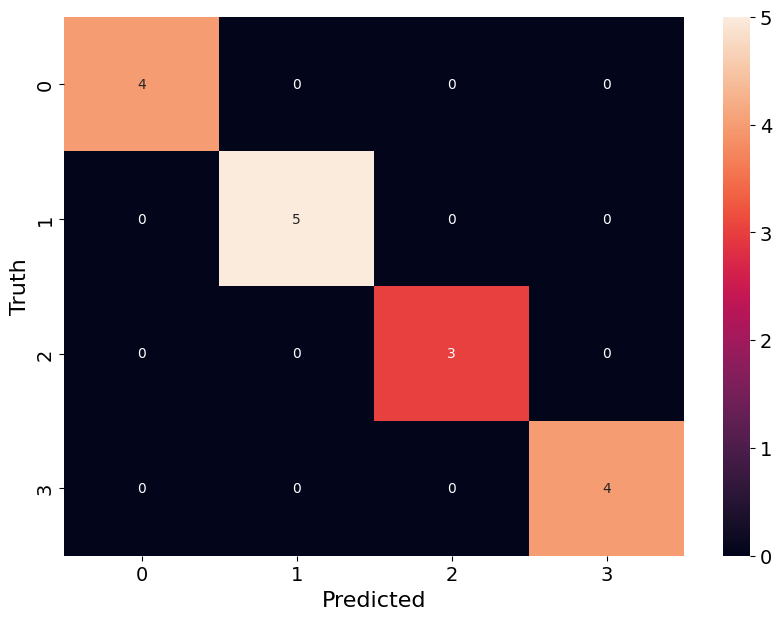

In [93]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
prediction_10 = xgb_clf.predict(X_test)
print('Accuracy of extreme GradientBoosting Classifier on training set: {:.4f}'.format(xgb_clf.score(X_train, y_train)))
print('Accuracy of extreme GradientBoosting Classifier on test set    : {:.4f}'.format(xgb_clf.score(X_test, y_test)))
print("\n Classification report for extremeGradientBoosting Classifier %s:\n%s\n" % (xgb_clf, metrics.classification_report(y_test, prediction_10)))
accuracy_10= round(accuracy_score(y_test,prediction_10),4)
precision_10= round(precision_score(y_test,prediction_10,average = 'macro'),4)
recall_10= round(recall_score(y_test,prediction_10, average = 'macro'),4)
f1_10 = round(f1_score(y_test,prediction_10, average = 'macro'),4)
print('Accuracy Score   : ', accuracy_10)
print('Precision Score  : ', precision_10)
print('Recall Score     : ', recall_10)
print('f1-Score         : ', f1_10)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_10))
from  sklearn.metrics import confusion_matrix , accuracy_score
cm_log = confusion_matrix(y_test ,prediction_10)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [94]:
table = {'Classifier' : ['Random Forest Classifier', 'SVM Classifier', 'Multinomial NB Classifier', 'Logistic Regression', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Xtreme Gradient Boosting Classifier', 'Light Gradient Boosting Classifier','Bagging Classifier','knn Classifier'], 'Accuracy Score' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7, accuracy_8,accuracy_9,accuracy_10], 'Precision Score' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7, precision_8,precision_9,precision_10], 'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7, recall_8,recall_9,recall_10], 'f1-Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_8,f1_9,f1_10]}
table = pd.DataFrame(table)
table

Classifier  Accuracy Score  Precision Score  \
0             Random Forest Classifier          0.8750           0.9286   
1                       SVM Classifier          0.8750           0.9286   
2            Multinomial NB Classifier          0.9375           0.9583   
3                  Logistic Regression          0.8750           0.9286   
4                  AdaBoost Classifier          0.7500           0.6389   
5         Gradient Boosting Classifier          1.0000           1.0000   
6  Xtreme Gradient Boosting Classifier          1.0000           1.0000   
7   Light Gradient Boosting Classifier          1.0000           1.0000   
8                   Bagging Classifier          0.8750           0.9167   
9                       knn Classifier          1.0000           1.0000   

   Recall Score  f1-Score  
0        0.8542    0.8726  
1        0.8542    0.8726  
2        0.9167    0.9273  
3        0.8542    0.8726  
4        0.7500    0.6786  
5        1.0000    1.0000  
6        1.0000    1.0000  
7        1.0000    1.0000  
8        0.8750    0.8667  
9        1.0000    1.0000